In [73]:
import warnings
from datetime import datetime
from heapq import merge
from unicodedata import category

from PIL.ImagePalette import random
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from PIL.TiffImagePlugin import DATE_TIME
from scipy.spatial.distance import correlation

warnings.filterwarnings("ignore", category=FutureWarning)

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

client_data = pd.read_csv('/Users/geetgrover/Downloads/client_data (1).csv', sep = ',')
client_data.head(5)

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month  date_activ    date_end  \
0         0         54946                0  15/06/2013  15/06/2016   
1      4660             0                0  21/08/2009  30/08/2016   
2       544             0                0  16/04/2010  16/04/2016   
3      1584             0                0  30/03/2010  30/03/2016   
4      4425             0              526  13/01/2010  07/03/2016   

  date_modif_prod date_renewal  forecast_cons_12m  ...  has_gas  imp_cons  \
0      01/11/2015   23/06/2015               0.00  ...        t      0.00   
1      21/08/2009   31/08/2015             189.95  ...        f      0.00   
2      16/04/2010   17/04/2015              47.96  ...        f      0.00   
3      30/03/2010   31/03/2015             240.04  ...        f      0.00   
4      13/01/2010   09/03/2015             445.75  ...        f     52.32   

   margin_gross_pow_ele  margin_net_pow_ele  nb_prod_act  net_margin  \
0                 25.44               25.44            2      678.99   
1                 16.38               16.38            1       18.89   
2                 28.60               28.60            1        6.60   
3                 30.22               30.22            1       25.46   
4                 44.91               44.91            1       47.98   

  num_years_antig                         origin_up  pow_max  churn  
0               3  lxidpiddsbxsbosboudacockeimpuepw   43.648      1  
1               6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.800      0  
2               6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.856      0  
3               6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.200      0  
4               6  kamkkxfxxuwbdslkwifmmcsiusiuosws   19.800      0  

[5 rows x 26 columns]

In [75]:
price_data = pd.read_csv('/Users/geetgrover/Downloads/price_data (1).csv', sep = ',')
price_data.head(5)

id  price_date  price_off_peak_var  \
0  038af19179925da21a25619c5a24b745  2015-01-01            0.151367   
1  038af19179925da21a25619c5a24b745  2015-02-01            0.151367   
2  038af19179925da21a25619c5a24b745  2015-03-01            0.151367   
3  038af19179925da21a25619c5a24b745  2015-04-01            0.149626   
4  038af19179925da21a25619c5a24b745  2015-05-01            0.149626   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0             0.0                 0.0           44.266931             0.0   
1             0.0                 0.0           44.266931             0.0   
2             0.0                 0.0           44.266931             0.0   
3             0.0                 0.0           44.266931             0.0   
4             0.0                 0.0           44.266931             0.0   

   price_mid_peak_fix  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0

In [76]:
client_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  int64  
 12  forecast_meter_rent_12m         

In [77]:
price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [78]:
client_data.describe()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  1.460600e+04  1.460600e+04     14606.000000       14606.000000   
mean   1.592203e+05  2.809238e+04     16090.269752        1868.614880   
std    5.734653e+05  1.629731e+05     64364.196422        2387.571531   
min    0.000000e+00  0.000000e+00         0.000000           0.000000   
25%    5.674750e+03  0.000000e+00         0.000000         494.995000   
50%    1.411550e+04  0.000000e+00       792.500000        1112.875000   
75%    4.076375e+04  0.000000e+00      3383.000000        2401.790000   
max    6.207104e+06  4.154590e+06    771203.000000       82902.830000   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count        14606.000000              14606.000000             14606.000000   
mean          1399.762906                  0.966726                63.086871   
std           3247.786255                  5.108289                66.165783   
min              0.000000                  0.000000                 0.000000   
25%              0.000000                  0.000000                16.180000   
50%            314.000000                  0.000000                18.795000   
75%           1745.750000                  0.000000               131.030000   
max         175375.000000                 30.000000               599.310000   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
count                    14606.000000                14606.000000   
mean                         0.137283                    0.050491   
std                          0.024623                    0.049037   
min                          0.000000                    0.000000   
25%                          0.116340                    0.000000   
50%                          0.143166                    0.084138   
75%                          0.146348                    0.098837   
max                          0.273963                    0.195975   

       forecast_price_pow_off_peak      imp_cons  margin_gross_pow_ele  \
count                 14606.000000  14606.000000          14606.000000   
mean                     43.130056    152.786896             24.565121   
std                       4.485988    341.369366             20.231172   
min                       0.000000      0.000000              0.000000   
25%                      40.606701      0.000000             14.280000   
50%                      44.311378     37.395000             21.640000   
75%                      44.311378    193.980000             29.880000   
max                      59.266378  15042.790000            374.640000   

       margin_net_pow_ele   nb_prod_act    net_margin  num_years_antig  \
count        14606.000000  14606.000000  14606.000000     14606.000000   
mean            24.562517      1.292346    189.264522         4.997809   
std             20.230280      0.709774    311.798130         1.611749   
min              0.000000      1.000000      0.000000         1.000000   
25%             14.280000      1.000000     50.712500         4.000000   
50%             21.640000      1.000000    112.530000         5.000000   
75%             29.880000      1.000000    243.097500         6.000000   
max            374.640000     32.000000  24570.650000        13.000000   

            pow_max         churn  
count  14606.000000  14606.000000  
mean      18.135136      0.097152  
std       13.534743      0.296175  
min        3.300000      0.000000  
25%       12.500000      0.000000  
50%       13.856000      0.000000  
75%       19.172500      0.000000  
max      320.000000      1.000000

In [79]:
price_data.describe()

price_off_peak_var  price_peak_var  price_mid_peak_var  \
count       193002.000000   193002.000000       193002.000000   
mean             0.141027        0.054630            0.030496   
std              0.025032        0.049924            0.036298   
min              0.000000        0.000000            0.000000   
25%              0.125976        0.000000            0.000000   
50%              0.146033        0.085483            0.000000   
75%              0.151635        0.101673            0.072558   
max              0.280700        0.229788            0.114102   

       price_off_peak_fix  price_peak_fix  price_mid_peak_fix  
count       193002.000000   193002.000000       193002.000000  
mean            43.334477       10.622875            6.409984  
std              5.410297       12.841895            7.773592  
min              0.000000        0.000000            0.000000  
25%             40.728885        0.000000            0.000000  
50%             44.266930        0.000000            0.000000  
75%             44.444710       24.339581           16.226389  
max             59.444710       36.490692           17.458221

## Data visualization
### Below are some functions that we are using to get started with visualizations.

In [80]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

## In the above line of code 
### Uses pandas and matplotlib for plotting
### Focuses on visualizing retention vs. churn
### Provides flexible plotting with various customization options
### Adds value annotations to make the plot more informative

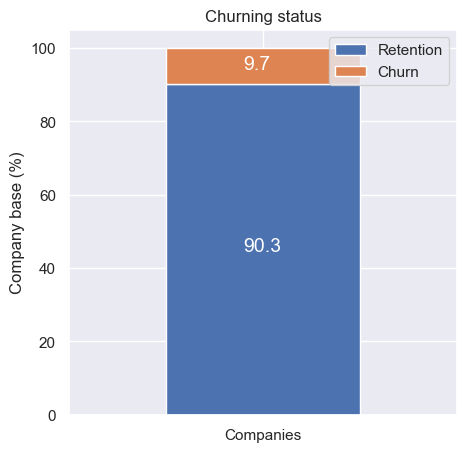

In [81]:
churn = client_data[['id', 'churn']]  # Creates a new DataFrame with only the 'id' and 'churn' columns from the original client_data
churn.columns = ['Companies', 'churn']  # Renames the columns to 'Companies' and 'churn'
churn_total = churn.groupby(churn['churn']).count()  # 1**Groups the data by the 'churn' column (0 or 1) 2**Counts the number of companies in each churn group 3**This will create a DataFrame showing the total count of companies for each churn status
churn_percentage = churn_total / churn_total.sum() * 100  #Calculates the percentage of companies in each churn group and Divides each group's count by the total count and multiplies by 100
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="upper right")  #Calls the plot_stacked_bars() function with: churn_percentage.transpose(): Transposes the data for plotting "Churning status" as the title Figure size of (5, 5) Legend in the upper right corner

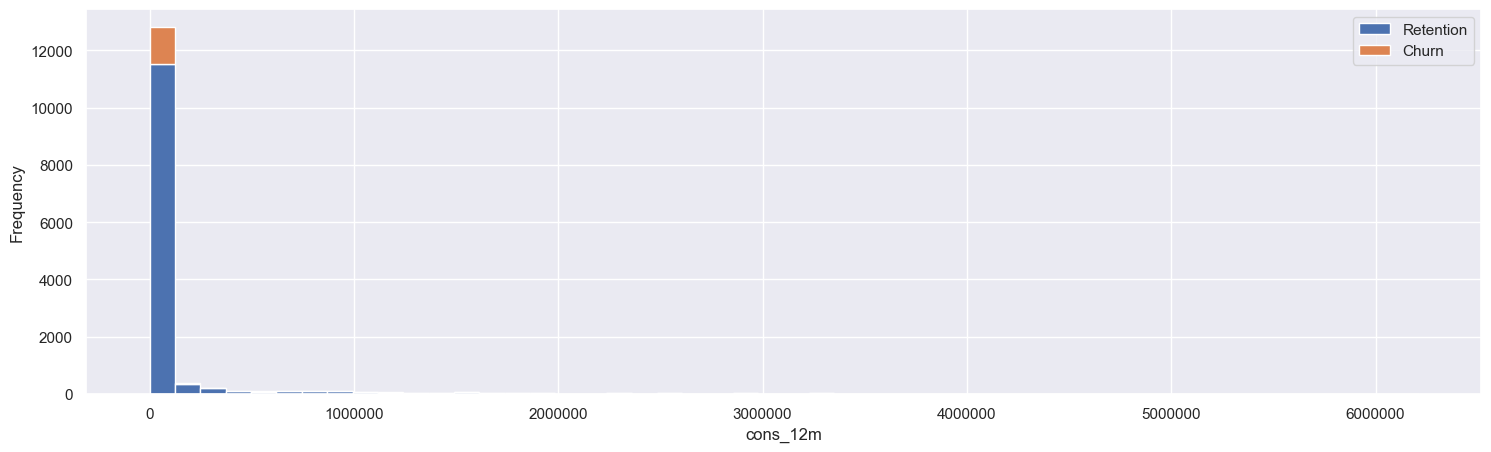

In [82]:
consumption = client_data[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

fig, axs = plt.subplots(nrows=1, figsize=(18, 5))

plot_distribution(consumption, 'cons_12m', axs)

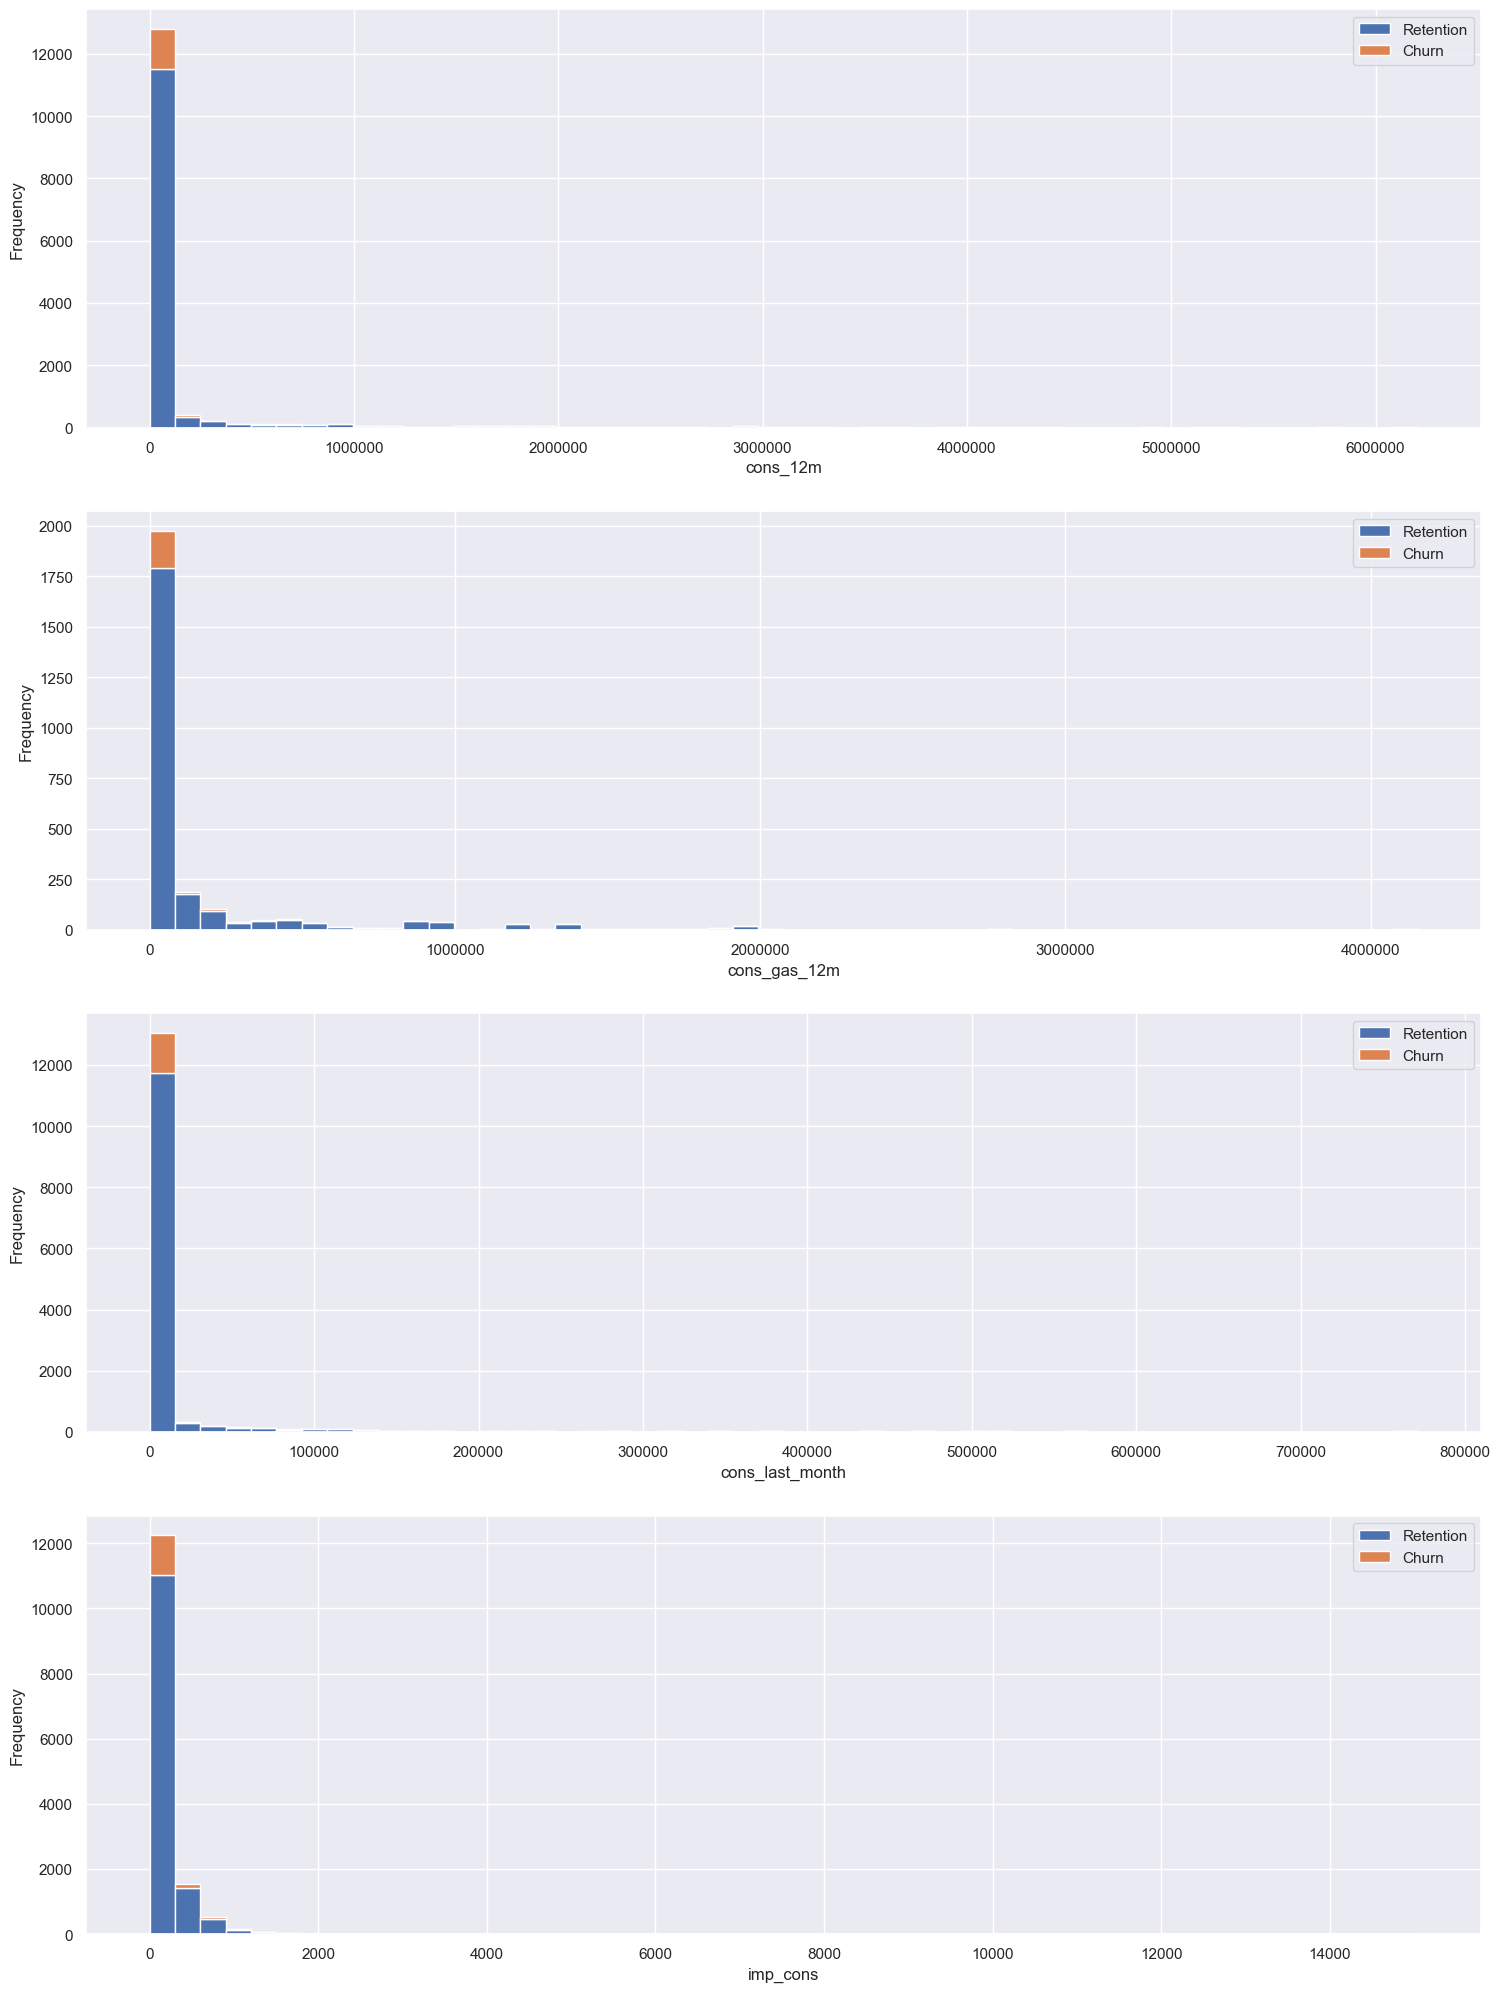

In [83]:
fig, axs = plt.subplots(nrows=4, figsize=(18, 25))

plot_distribution(consumption, 'cons_12m', axs[0])
plot_distribution(consumption[consumption['has_gas'] == 't'], 'cons_gas_12m', axs[1])
plot_distribution(consumption, 'cons_last_month', axs[2])
plot_distribution(consumption, 'imp_cons', axs[3])

Clearly, the consumption data is highly positively skewed, presenting a very long right-tail towards the higher values of the distribution. The values on the higher and lower end of the distribution are likely to be outliers. We can use a standard plot to visualise the outliers in more detail. A boxplot is a standardized way of displaying the distribution based on a five number summary:
- Minimum
- First quartile (Q1)
- Median
- Third quartile (Q3)
- Maximum

It can reveal outliers and what their values are. It can also tell us if our data is symmetrical, how tightly our data is grouped and if/how our data is skewed.

In [84]:
def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distribution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
                         "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

In [85]:
channel = client_data[['id', 'channel_sales', 'churn']]
channel = channel.groupby([channel['channel_sales'], channel['churn']])['id'].count().unstack(level=1).fillna(0)
channel_churn = (channel.div(channel.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

### In the above line of code we are doing the below steps
#### Groups the data by channel_sales and churn
#### Counts the number of ids in each group
#### unstack(level=1) transforms the data so churn becomes columns
#### fillna(0) replaces any missing values with 0

### div(channel.sum(axis=1), axis=0) then divides each group (churned and non-churned) by this total, effectively calculating the proportion of customers in each group.
#### channel.sum(axis=1) calculates the total number of customers for each sales channel across both churned and non-churned groups.

#### Actually, the code uses sort_values(by=[1], ascending=False) because in pandas, when unstacking churn, the columns are typically labeled as:

##### 0: Non-churned customers
##### 1: Churned customers

##### If you see a column labeled 2 instead of 1, it might indicate:

##### A different data structure
##### A potential issue with how the churn column is being processed


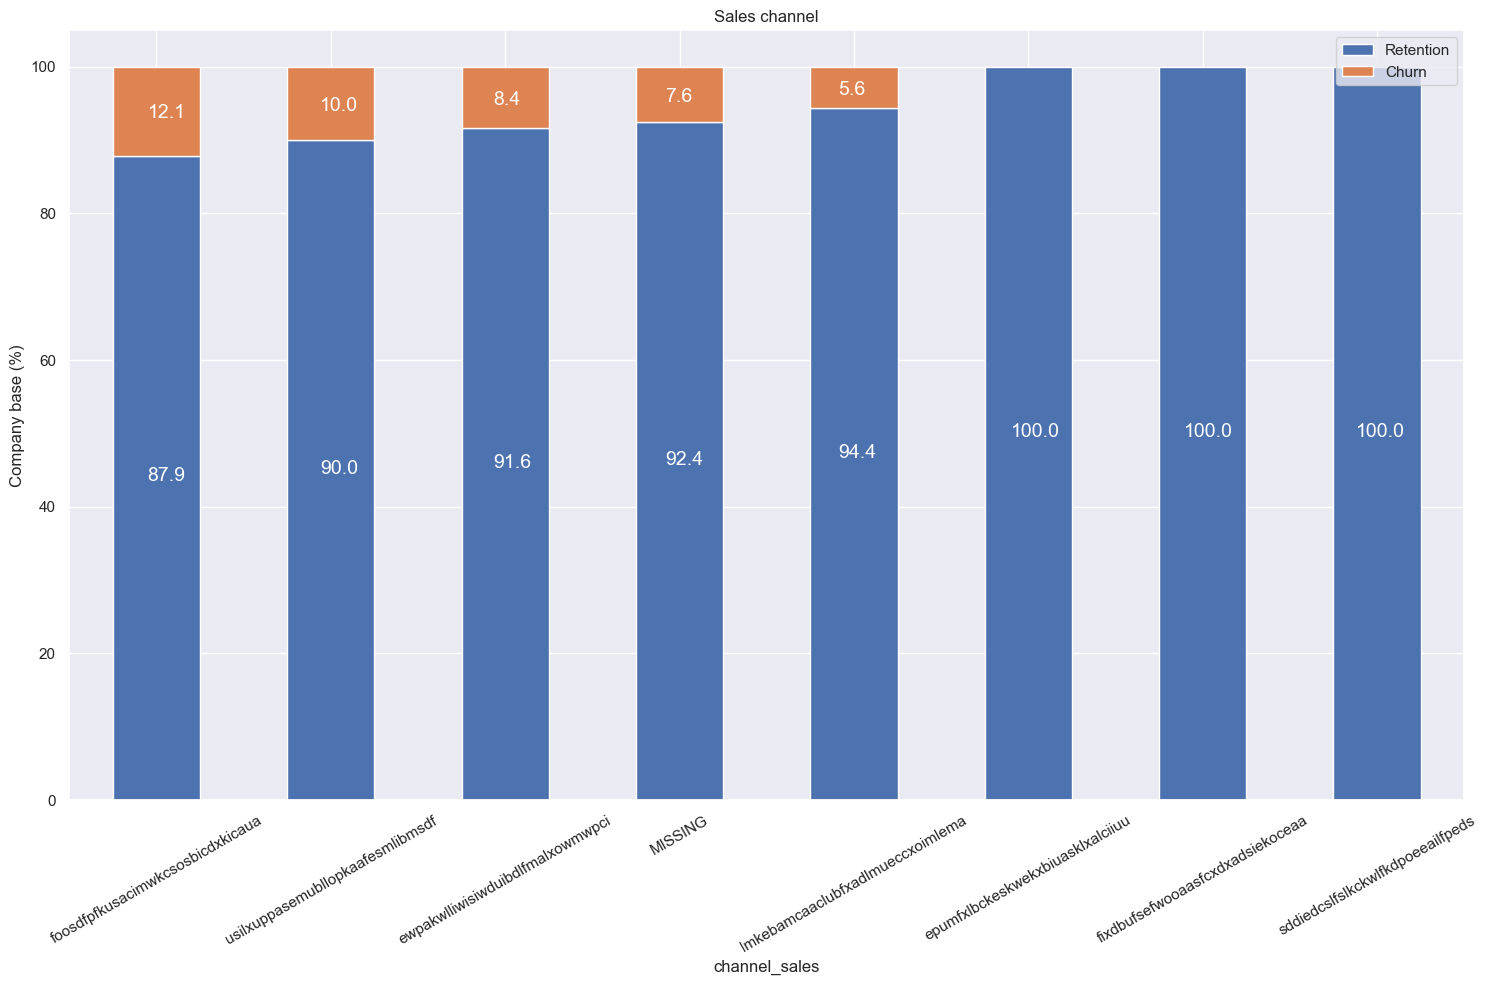

In [86]:
plot_stacked_bars(channel_churn, 'Sales channel', rot_=30)

### The function seems designed to create a stacked bar chart that shows:

#### Each sales channel on the x-axis
#### Percentage of churned vs. non-churned customers as stacked bars
#### X-axis labels rotated 30 degrees for better readability

## We can also write the above code as showing down below:-

<Figure size 3000x1800 with 0 Axes>

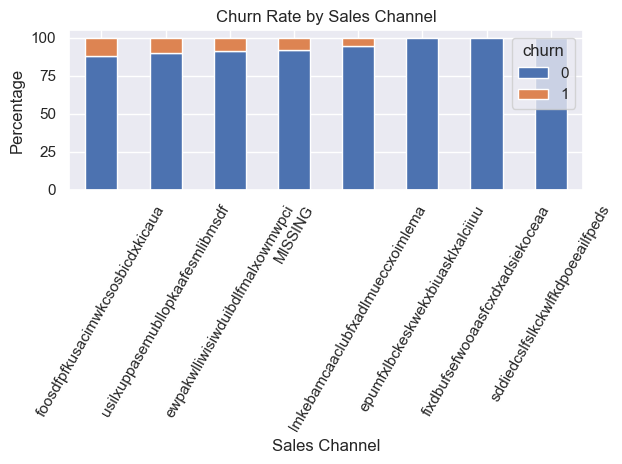

In [87]:
plt.figure(figsize=(30,18))
channel_churn.plot(kind='bar', stacked=True)
plt.title('Churn Rate by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Percentage')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

Interestingly, the churning customers are distributed over 5 different values for `channel_sales`. As well as this, the value of `MISSING` has a churn rate of 7.6%. `MISSING` indicates a missing value and was added by the team when they were cleaning the dataset. This feature could be an important feature when it comes to building our model.

### Forecast

In [88]:
forecast = client_data[
    ["id", "forecast_cons_12m",
     "forecast_cons_year","forecast_discount_energy","forecast_meter_rent_12m",
     "forecast_price_energy_off_peak","forecast_price_energy_peak",
     "forecast_price_pow_off_peak","churn"
     ]
]

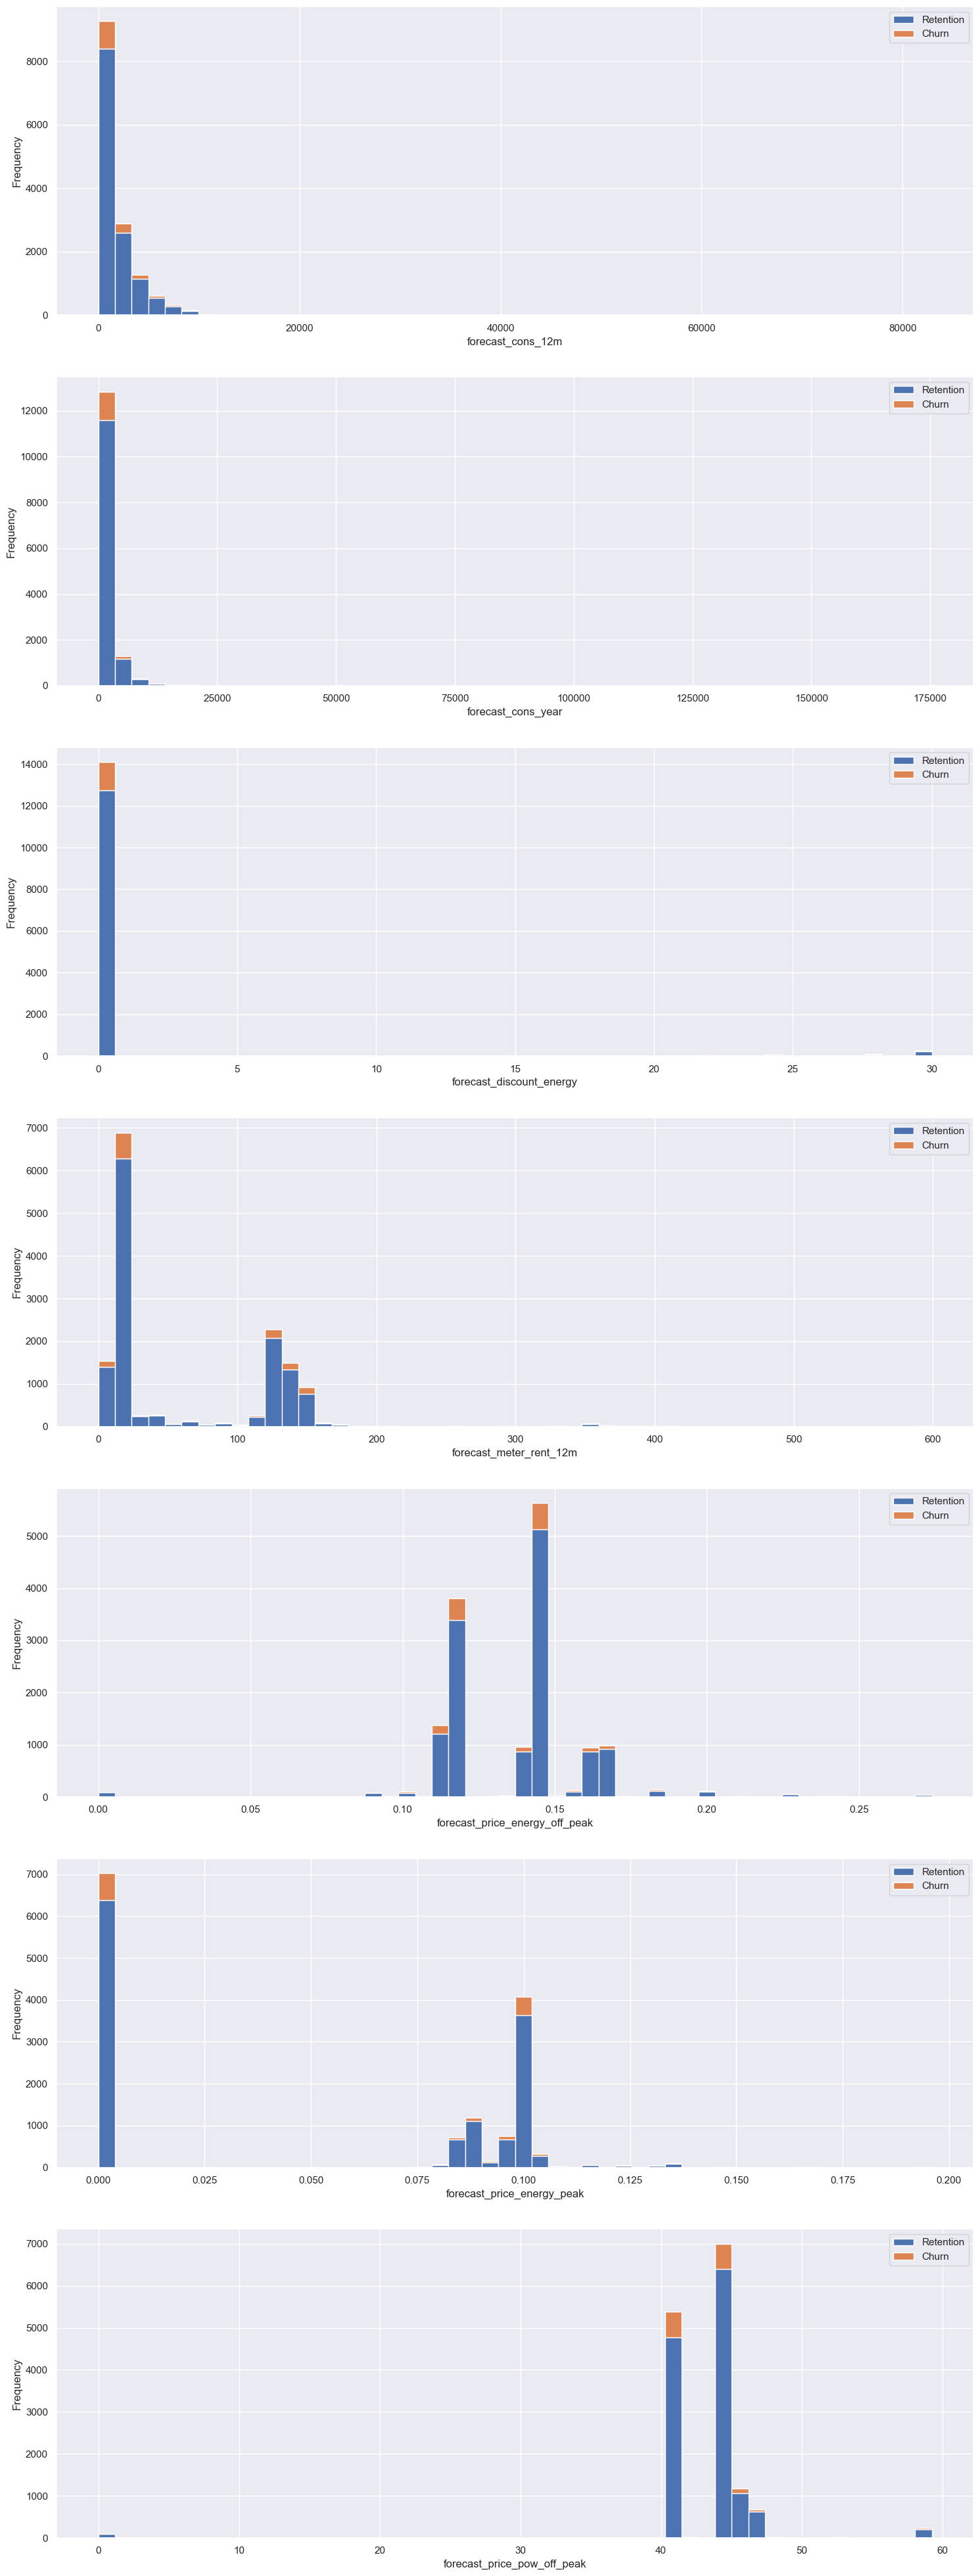

In [89]:
fig, axs = plt.subplots(nrows=7, figsize=(18,50))

# Plot histogram
plot_distribution(client_data, "forecast_cons_12m", axs[0])
plot_distribution(client_data, "forecast_cons_year", axs[1])
plot_distribution(client_data, "forecast_discount_energy", axs[2])
plot_distribution(client_data, "forecast_meter_rent_12m", axs[3])
plot_distribution(client_data, "forecast_price_energy_off_peak", axs[4])
plot_distribution(client_data, "forecast_price_energy_peak", axs[5])
plot_distribution(client_data, "forecast_price_pow_off_peak", axs[6])

Similarly to the consumption plots, we can observe that a lot of the variables are highly positively skewed, creating a very long tail for the higher values. We will make some transformations during the next exercise to correct for this skewness.
### Contract type

In [90]:
contract_type = client_data[['id', 'has_gas', 'churn']]
contract = contract_type.groupby([contract_type['churn'], contract_type['has_gas']])['id'].count().unstack(level=0)
contract_percentage = (contract.div(contract.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

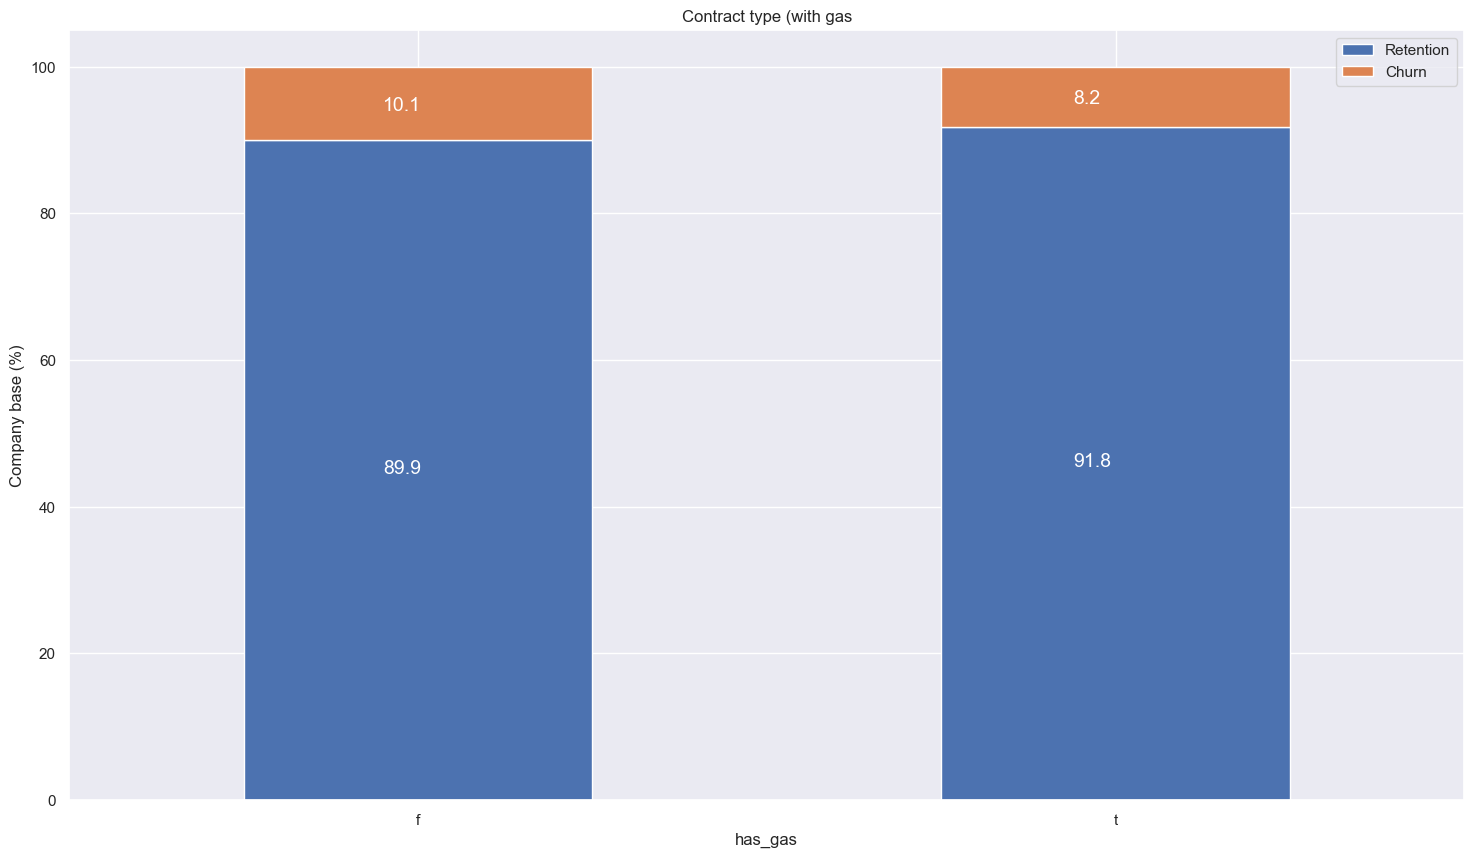

In [91]:
plot_stacked_bars(contract_percentage, 'Contract type (with gas')


#### Subscribed Power

In [92]:
power = client_data[['id', 'pow_max', 'churn']]

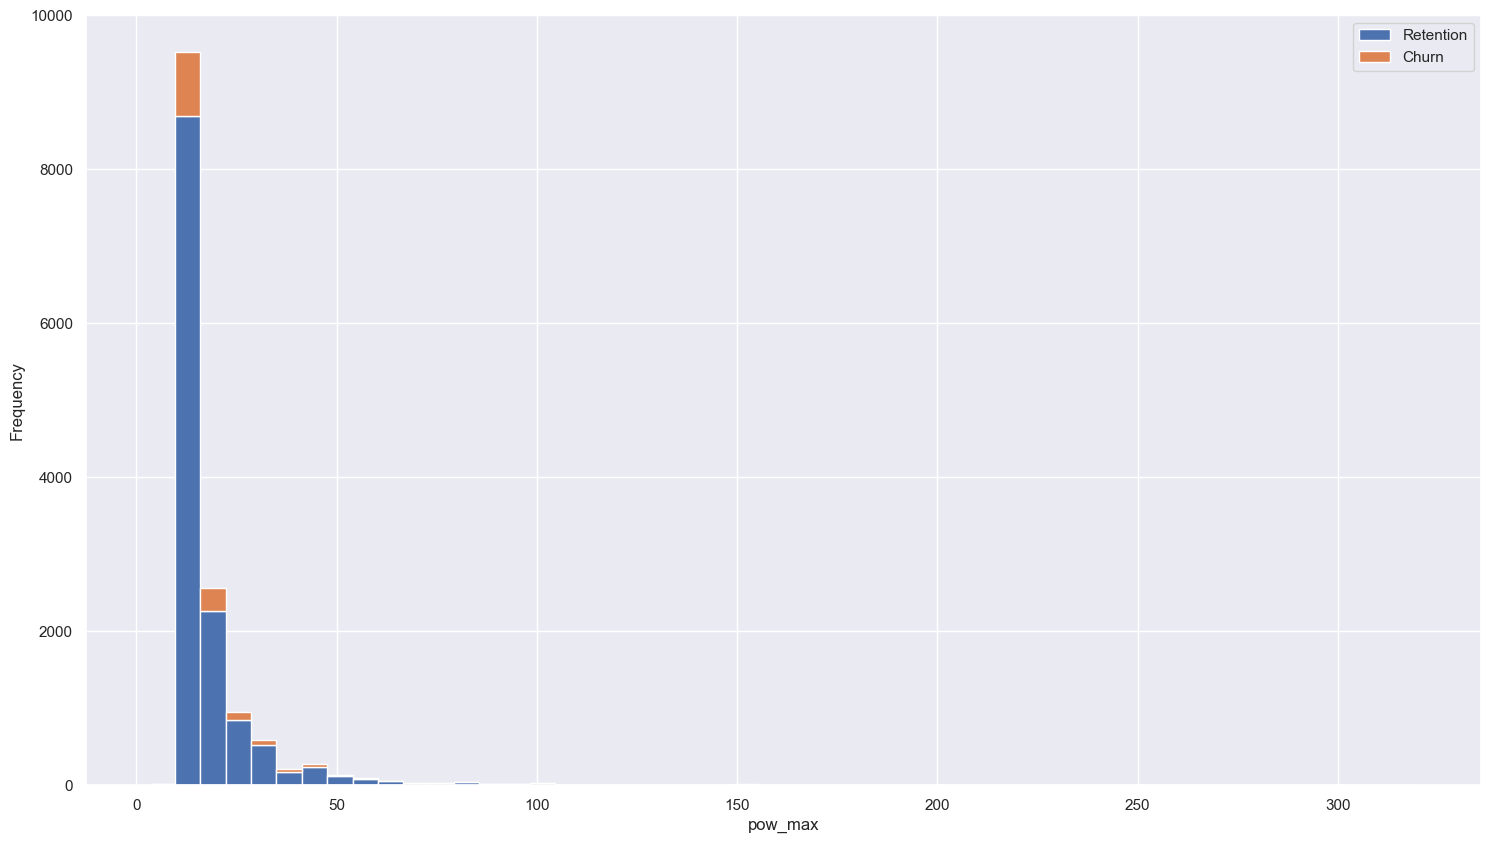

In [93]:
fig, axs = plt.subplots(nrows=1, figsize=(18, 10))
plot_distribution(power, 'pow_max', axs)

In [94]:

        
price_df = pd.read_csv('/Users/geetgrover/Downloads/price_data (1).csv', sep = ',')
price_df

id  price_date  price_off_peak_var  \
0       038af19179925da21a25619c5a24b745  2015-01-01            0.151367   
1       038af19179925da21a25619c5a24b745  2015-02-01            0.151367   
2       038af19179925da21a25619c5a24b745  2015-03-01            0.151367   
3       038af19179925da21a25619c5a24b745  2015-04-01            0.149626   
4       038af19179925da21a25619c5a24b745  2015-05-01            0.149626   
...                                  ...         ...                 ...   
192997  16f51cdc2baa19af0b940ee1b3dd17d5  2015-08-01            0.119916   
192998  16f51cdc2baa19af0b940ee1b3dd17d5  2015-09-01            0.119916   
192999  16f51cdc2baa19af0b940ee1b3dd17d5  2015-10-01            0.119916   
193000  16f51cdc2baa19af0b940ee1b3dd17d5  2015-11-01            0.119916   
193001  16f51cdc2baa19af0b940ee1b3dd17d5  2015-12-01            0.119916   

        price_peak_var  price_mid_peak_var  price_off_peak_fix  \
0             0.000000            0.000000           44.266931   
1             0.000000            0.000000           44.266931   
2             0.000000            0.000000           44.266931   
3             0.000000            0.000000           44.266931   
4             0.000000            0.000000           44.266931   
...                ...                 ...                 ...   
192997        0.102232            0.076257           40.728885   
192998        0.102232            0.076257           40.728885   
192999        0.102232            0.076257           40.728885   
193000        0.102232            0.076257           40.728885   
193001        0.102232            0.076257           40.728885   

        price_peak_fix  price_mid_peak_fix  
0              0.00000            0.000000  
1              0.00000            0.000000  
2              0.00000            0.000000  
3              0.00000            0.000000  
4              0.00000            0.000000  
...                ...                 ...  
192997        24.43733           16.291555  
192998        24.43733           16.291555  
192999        24.43733           16.291555  
193000        24.43733           16.291555  
193001        24.43733           16.291555  

[193002 rows x 8 columns]

In [95]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

id  offpeak_diff_dec_january_energy  \
0  0002203ffbb812588b632b9e628cc38d                        -0.006192   
1  0004351ebdd665e6ee664792efc4fd13                        -0.004104   
2  0010bcc39e42b3c2131ed2ce55246e3c                         0.050443   
3  0010ee3855fdea87602a5b7aba8e42de                        -0.010018   
4  00114d74e963e47177db89bc70108537                        -0.003994   

   offpeak_diff_dec_january_power  
0                        0.162916  
1                        0.177779  
2                        1.500000  
3                        0.162916  
4                       -0.000001

### 1. Group and Aggregate Data
#### Explanation: 
##### df.groupby(['id', 'price_date']) groups the DataFrame by these two columns.
##### .agg({...}) applies aggregation functions; here, it's calculating the mean for both price_off_peak_var and price_off_peak_fix.
##### .reset_index() converts the group indices back into regular columns, making id and price_date regular columns again

### 2. Extract January and December Prices

#### Purpose:
##### This code extracts the first (January) and last (December) price entries for each id.

#### Explanation:
##### groupby('id') groups by company ID.
##### .first() and .last() get the first and last entries per group respectively, assuming data is sorted by price_date.
##### .reset_index() again turns the group indices back into columns.

### 3. Calculate Differences

#### Purpose: 
##### Merge December and January data to compare prices.
#### Explanation:
##### dec_prices.rename(columns=...) renames columns for clarity when merging.
##### jan_prices.drop(columns='price_date') removes the price_date column because it's not needed for merging.
##### pd.merge(...) merges these DataFrames on the id column.

### 4. Compute Differences
#### Purpose: 
##### Merge December and January data to compare prices.
#### Explanation:
##### dec_prices.rename(columns=...) renames columns for clarity when merging.
##### jan_prices.drop(columns='price_date') removes the price_date column because it's not needed for merging.
##### pd.merge(...) merges these DataFrames on the id column.



In [96]:
price_df = pd.merge(price_df, diff, on='id')
price_df.head()


id  price_date  price_off_peak_var  \
0  038af19179925da21a25619c5a24b745  2015-01-01            0.151367   
1  038af19179925da21a25619c5a24b745  2015-02-01            0.151367   
2  038af19179925da21a25619c5a24b745  2015-03-01            0.151367   
3  038af19179925da21a25619c5a24b745  2015-04-01            0.149626   
4  038af19179925da21a25619c5a24b745  2015-05-01            0.149626   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0             0.0                 0.0           44.266931             0.0   
1             0.0                 0.0           44.266931             0.0   
2             0.0                 0.0           44.266931             0.0   
3             0.0                 0.0           44.266931             0.0   
4             0.0                 0.0           44.266931             0.0   

   price_mid_peak_fix  offpeak_diff_dec_january_energy  \
0                 0.0                        -0.005508   
1                 0.0                        -0.005508   
2                 0.0                        -0.005508   
3                 0.0                        -0.005508   
4                 0.0                        -0.005508   

   offpeak_diff_dec_january_power  
0                        0.177779  
1                        0.177779  
2                        0.177779  
3                        0.177779  
4                        0.177779

## Average price changes across periods
We can now enhance the feature that our colleague made by calculating the average price changes across individual periods, instead of the entire year.


In [97]:
clean_data_after_eda = pd.read_csv('/Users/geetgrover/Downloads/clean_data_after_eda.csv', sep = ',')
df = clean_data_after_eda
df

id                     channel_sales  \
0      24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1      d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2      764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3      bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4      149d57cf92fc41cf94415803a877cb4b                           MISSING   
...                                 ...                               ...   
14601  18463073fb097fc0ac5d3e040f356987  foosdfpfkusacimwkcsosbicdxkicaua   
14602  d0a6f71671571ed83b2645d23af6de00  foosdfpfkusacimwkcsosbicdxkicaua   
14603  10e6828ddd62cbcf687cb74928c4c2d2  foosdfpfkusacimwkcsosbicdxkicaua   
14604  1cf20fd6206d7678d5bcafd28c53b4db  foosdfpfkusacimwkcsosbicdxkicaua   
14605  563dde550fd624d7352f3de77c0cdfcd                           MISSING   

       cons_12m  cons_gas_12m  cons_last_month  date_activ    date_end  \
0             0         54946                0  2013-06-15  2016-06-15   
1          4660             0                0  2009-08-21  2016-08-30   
2           544             0                0  2010-04-16  2016-04-16   
3          1584             0                0  2010-03-30  2016-03-30   
4          4425             0              526  2010-01-13  2016-03-07   
...         ...           ...              ...         ...         ...   
14601     32270         47940                0  2012-05-24  2016-05-08   
14602      7223             0              181  2012-08-27  2016-08-27   
14603      1844             0              179  2012-02-08  2016-02-07   
14604       131             0                0  2012-08-30  2016-08-30   
14605      8730             0                0  2009-12-18  2016-12-17   

      date_modif_prod date_renewal  forecast_cons_12m  ...  \
0          2015-11-01   2015-06-23               0.00  ...   
1          2009-08-21   2015-08-31             189.95  ...   
2          2010-04-16   2015-04-17              47.96  ...   
3          2010-03-30   2015-03-31             240.04  ...   
4          2010-01-13   2015-03-09             445.75  ...   
...               ...          ...                ...  ...   
14601      2015-05-08   2014-05-26            4648.01  ...   
14602      2012-08-27   2015-08-28             631.69  ...   
14603      2012-02-08   2015-02-09             190.39  ...   
14604      2012-08-30   2015-08-31              19.34  ...   
14605      2009-12-18   2015-12-21             762.41  ...   

       var_6m_price_off_peak_var  var_6m_price_peak_var  \
0                       0.000131           4.100838e-05   
1                       0.000003           1.217891e-03   
2                       0.000004           9.450150e-08   
3                       0.000003           0.000000e+00   
4                       0.000011           2.896760e-06   
...                          ...                    ...   
14601                   0.000003           0.000000e+00   
14602                   0.000009           2.225451e-06   
14603                   0.000011           2.896760e-06   
14604                   0.000003           1.217891e-03   
14605                   0.000004           9.450150e-08   

       var_6m_price_mid_peak_var  var_6m_price_off_peak_fix  \
0                   9.084737e-04                   2.086294   
1                   0.000000e+00                   0.009482   
2                   0.000000e+00                   0.000000   
3                   0.000000e+00                   0.000000   
4                   4.860000e-10                   0.000000   
...                          ...                        ...   
14601               0.000000e+00                   0.000000   
14602               1.802667e-08                   0.014939   
14603               4.860000e-10                   0.000000   
14604               0.000000e+00                   0.009482   
14605               0.000000e+00                   0.000000   

       var_6

In [98]:
# Aggregate average prices per period by company
mean_prices = price_df.groupby(['id']).agg({
    'price_off_peak_var': 'mean',
    'price_peak_var': 'mean',
    'price_mid_peak_var': 'mean',
    'price_off_peak_fix': 'mean',
    'price_peak_fix': 'mean',
    'price_mid_peak_fix': 'mean'
}).reset_index()

The above code calculates the average prices for different time periods (off-peak, peak, mid-peak) and types (variable and fixed) for each company represented by id.

In [99]:
# Calculate the mean difference between consecutive periods
mean_prices['off_peak_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_peak_var']
mean_prices['peak_mid_peak_var_mean_diff'] = mean_prices['price_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_mid_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_peak_fix']
mean_prices['peak_mid_peak_fix_mean_diff'] = mean_prices['price_peak_fix'] - mean_prices['price_mid_peak_fix']
mean_prices['off_peak_mid_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_mid_peak_fix']

The above code snippet adds new columns to the mean_prices DataFrame, calculating the mean differences between various price periods for both variable and fixed pricing structures. 

In [100]:
columns = [
    'id',
    'off_peak_peak_var_mean_diff',
    'peak_mid_peak_var_mean_diff',
    'off_peak_mid_peak_var_mean_diff',
    'off_peak_peak_fix_mean_diff',
    'peak_mid_peak_fix_mean_diff',
    'off_peak_mid_peak_fix_mean_diff'
]
df = pd.merge(df, mean_prices[columns], on='id')
df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month  date_activ    date_end  \
0         0         54946                0  2013-06-15  2016-06-15   
1      4660             0                0  2009-08-21  2016-08-30   
2       544             0                0  2010-04-16  2016-04-16   
3      1584             0                0  2010-03-30  2016-03-30   
4      4425             0              526  2010-01-13  2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  var_6m_price_off_peak  \
0      2015-11-01   2015-06-23               0.00  ...               2.086425   
1      2009-08-21   2015-08-31             189.95  ...               0.009485   
2      2010-04-16   2015-04-17              47.96  ...               0.000004   
3      2010-03-30   2015-03-31             240.04  ...               0.000003   
4      2010-01-13   2015-03-09             445.75  ...               0.000011   

   var_6m_price_peak  var_6m_price_mid_peak  churn  \
0       9.953056e+01           4.423670e+01      1   
1       1.217891e-03           0.000000e+00      0   
2       9.450150e-08           0.000000e+00      0   
3       0.000000e+00           0.000000e+00      0   
4       2.896760e-06           4.860000e-10      0   

   off_peak_peak_var_mean_diff  peak_mid_peak_var_mean_diff  \
0                     0.024038                     0.034219   
1                     0.142485                     0.007124   
2                     0.082090                     0.088421   
3                     0.151210                     0.000000   
4                     0.020536                     0.030773   

  off_peak_mid_peak_var_mean_diff  off_peak_peak_fix_mean_diff  \
0                        0.058257                    18.590255   
1                        0.149609                    44.311375   
2                        0.170512                    44.385450   
3                        0.151210                    44.400265   
4                        0.051309                    16.275263   

   peak_mid_peak_fix_mean_diff  off_peak_mid_peak_fix_mean_diff  
0                     7.450670                        26.040925  
1                     0.000000                        44.311375  
2                     0.000000                        44.385450  
3                     0.000000                        44.400265  
4                     8.137629                        24.412893  

[5 rows x 50 columns]

This feature may be useful because it adds more granularity to the existing feature that my colleague found to be useful. Instead of looking at differences across an entire year, we have now created features that look at mean average price differences across different time periods (`off_peak`, `peak`, `mid_peak`). The dec-jan feature may reveal macro patterns that occur over an entire year, whereas inter-time-period features may reveal patterns on a micro scale between months.


## Max price changes across periods and months
Another way we can enhance the feature from our colleague is to look at the maximum change in prices across periods and months.


In [101]:
mean_prices_by_month = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean',
                                                                   'price_peak_var': 'mean',
                                                                   'price_mid_peak_var': 'mean',
                                                                   'price_off_peak_fix': 'mean',
                                                                   'price_peak_fix': 'mean',
                                                                   'price_mid_peak_fix': 'mean' })

In [102]:
# Calculate the mean difference between consecutive periods
mean_prices_by_month['off_peak_peak_var_mean_diff'] = mean_prices_by_month['price_off_peak_var'] - mean_prices_by_month['price_peak_var']
mean_prices_by_month['peak_mid_peak_var_mean_diff'] = mean_prices_by_month['price_peak_var'] - mean_prices_by_month['price_mid_peak_var']
mean_prices_by_month['off_peak_mid_peak_var_mean_diff'] = mean_prices_by_month['price_off_peak_var'] - mean_prices_by_month['price_mid_peak_var']
mean_prices_by_month['off_peak_peak_fix_mean_diff'] = mean_prices_by_month['price_off_peak_fix'] - mean_prices_by_month['price_peak_fix']
mean_prices_by_month['peak_mid_peak_fix_mean_diff'] = mean_prices_by_month['price_peak_fix'] - mean_prices_by_month['price_mid_peak_fix']
mean_prices_by_month['off_peak_mid_peak_fix_mean_diff'] = mean_prices_by_month['price_off_peak_fix'] - mean_prices_by_month['price_mid_peak_fix']

In [103]:
# Calculate the maximum monthly difference across time periods
max_diff_across_periods_months = mean_prices_by_month.groupby(['id']).agg({
    'off_peak_peak_var_mean_diff': 'max',
    'peak_mid_peak_var_mean_diff': 'max',
    'off_peak_mid_peak_var_mean_diff': 'max',
    'off_peak_peak_fix_mean_diff': 'max',
    'peak_mid_peak_fix_mean_diff': 'max',
    'off_peak_mid_peak_fix_mean_diff': 'max'
}).reset_index().rename(
    columns={
        'off_peak_peak_var_mean_diff': 'off_peak_peak_var_max_monthly_diff',
        'peak_mid_peak_var_mean_diff': 'peak_mid_peak_var_max_monthly_diff',
        'off_peak_mid_peak_var_mean_diff': 'off_peak_mid_peak_var_max_monthly_diff',
        'off_peak_peak_fix_mean_diff': 'off_peak_peak_fix_max_monthly_diff',
        'peak_mid_peak_fix_mean_diff': 'peak_mid_peak_fix_max_monthly_diff',
        'off_peak_mid_peak_fix_mean_diff': 'off_peak_mid_peak_fix_max_monthly_diff'
    }
)

In [104]:
columns = [
    'id',
    'off_peak_peak_var_max_monthly_diff',
    'peak_mid_peak_var_max_monthly_diff',
    'off_peak_mid_peak_var_max_monthly_diff',
    'off_peak_peak_fix_max_monthly_diff',
    'peak_mid_peak_fix_max_monthly_diff',
    'off_peak_mid_peak_fix_max_monthly_diff'
]

price_df = pd.merge(price_df, max_diff_across_periods_months[columns], on='id')
price_df.head()

id  price_date  price_off_peak_var  \
0  038af19179925da21a25619c5a24b745  2015-01-01            0.151367   
1  038af19179925da21a25619c5a24b745  2015-02-01            0.151367   
2  038af19179925da21a25619c5a24b745  2015-03-01            0.151367   
3  038af19179925da21a25619c5a24b745  2015-04-01            0.149626   
4  038af19179925da21a25619c5a24b745  2015-05-01            0.149626   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0             0.0                 0.0           44.266931             0.0   
1             0.0                 0.0           44.266931             0.0   
2             0.0                 0.0           44.266931             0.0   
3             0.0                 0.0           44.266931             0.0   
4             0.0                 0.0           44.266931             0.0   

   price_mid_peak_fix  offpeak_diff_dec_january_energy  \
0                 0.0                        -0.005508   
1                 0.0                        -0.005508   
2                 0.0                        -0.005508   
3                 0.0                        -0.005508   
4                 0.0                        -0.005508   

   offpeak_diff_dec_january_power  off_peak_peak_var_max_monthly_diff  \
0                        0.177779                            0.151367   
1                        0.177779                            0.151367   
2                        0.177779                            0.151367   
3                        0.177779                            0.151367   
4                        0.177779                            0.151367   

   peak_mid_peak_var_max_monthly_diff  off_peak_mid_peak_var_max_monthly_diff  \
0                                 0.0                                0.151367   
1                                 0.0                                0.151367   
2                                 0.0                                0.151367   
3                                 0.0                                0.151367   
4                                 0.0                                0.151367   

   off_peak_peak_fix_max_monthly_diff  peak_mid_peak_fix_max_monthly_diff  \
0                            44.44471                                 0.0   
1                            44.44471                                 0.0   
2                            44.44471                                 0.0   
3                            44.44471                                 0.0   
4                            44.44471                                 0.0   

   off_peak_mid_peak_fix_max_monthly_diff  
0                                44.44471  
1                                44.44471  
2                                44.44471  
3                                44.44471  
4                                44.44471

In [105]:
df = pd.merge(df, max_diff_across_periods_months[columns], on='id' )
df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month  date_activ    date_end  \
0         0         54946                0  2013-06-15  2016-06-15   
1      4660             0                0  2009-08-21  2016-08-30   
2       544             0                0  2010-04-16  2016-04-16   
3      1584             0                0  2010-03-30  2016-03-30   
4      4425             0              526  2010-01-13  2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  \
0      2015-11-01   2015-06-23               0.00  ...   
1      2009-08-21   2015-08-31             189.95  ...   
2      2010-04-16   2015-04-17              47.96  ...   
3      2010-03-30   2015-03-31             240.04  ...   
4      2010-01-13   2015-03-09             445.75  ...   

   off_peak_mid_peak_var_mean_diff  off_peak_peak_fix_mean_diff  \
0                         0.058257                    18.590255   
1                         0.149609                    44.311375   
2                         0.170512                    44.385450   
3                         0.151210                    44.400265   
4                         0.051309                    16.275263   

   peak_mid_peak_fix_mean_diff  off_peak_mid_peak_fix_mean_diff  \
0                     7.450670                        26.040925   
1                     0.000000                        44.311375   
2                     0.000000                        44.385450   
3                     0.000000                        44.400265   
4                     8.137629                        24.412893   

   off_peak_peak_var_max_monthly_diff  peak_mid_peak_var_max_monthly_diff  \
0                            0.060550                            0.085483   
1                            0.151367                            0.085483   
2                            0.084587                            0.089162   
3                            0.153133                            0.000000   
4                            0.022225                            0.033743   

  off_peak_mid_peak_var_max_monthly_diff  off_peak_peak_fix_max_monthly_diff  \
0                               0.146033                           44.266930   
1                               0.151367                           44.444710   
2                               0.172468                           44.444710   
3                               0.153133                           44.444710   
4                               0.055866                           16.291555   

   peak_mid_peak_fix_max_monthly_diff  off_peak_mid_peak_fix_max_monthly_diff  
0                            8.145775                                44.26693  
1                            0.000000                                44.44471  
2                            0.000000                                44.44471  
3                            0.000000                                44.44471  
4                            8.145775                                24.43733  

[5 rows x 56 columns]

I thought that calculating the maximum price change as done in the above code between months and time periods would be a good feature to create because I was trying to think from the perspective of a PowerCo client. As a Utilities customer, there is nothing more annoying than sudden price changes between months, and a large increase in prices within a short time span would be an influencing factor in causing me to look at other utilities providers for a better deal. Since we are trying to predict churn for this use case, I thought this would be an interesting feature to include.

### TENURE

How long a company has been a client of PowerCo.


In [106]:
# df = df.rename(columns={'num_years_antig': 'tenure'})

In [107]:
# Convert string dates to datetime
df['date_end'] = pd.to_datetime(df['date_end'])
df['date_activ'] = pd.to_datetime(df['date_activ'])
df['date_modif_prod'] = pd.to_datetime(df['date_modif_prod'])
df['date_renewal'] = pd.to_datetime(df['date_renewal'])


In [108]:
df['tenure'] = ((df['date_end'] - df['date_activ'])/ np.timedelta64(1, 'Y')).astype(int)

Subtracting Dates:
df['date_end'] - df['date_activ']: This operation subtracts the date_activ (activation date) from date_end for each row in the DataFrame. Since date_end and date_activ are assumed to be in datetime format after conversion, this subtraction results in a Timedelta object for each row, representing the duration between these two dates.

Dividing by a Timedelta:
/ np.timedelta64(1, 'Y'): This part divides each Timedelta by a numpy timedelta of 1 year ('Y' stands for year). np.timedelta64(1, 'Y') creates a timedelta object representing one year. By dividing by this, we convert the duration from days (or whatever the original unit of the Timedelta is) into years. 
Note that this is an approximation since years vary in length (leap years, etc.), but for many purposes, this is sufficiently accurate.

.astype(int): After dividing, the result is likely a floating-point number because even if the duration fits into a whole number of years, the division might yield a fractional result due to the inexact nature of year length. Casting to int truncates this to the nearest whole number, effectively rounding down.

Assigning to New Column:
df['tenure'] = ...: This assigns the calculated and type-cast values to a new column named tenure in the DataFrame df. Now, each row in df has a tenure value indicating how many years (as whole numbers) have passed between date_activ and date_end.

In [109]:
df.groupby(['tenure']).agg({'churn': 'mean'}).sort_values(by='churn', ascending=False)

churn
tenure          
2       0.176471
3       0.143874
4       0.127473
13      0.095238
5       0.091999
12      0.083333
7       0.075472
6       0.075407
11      0.059783
8       0.047244
10      0.045455
9       0.012500

We can see that companies who have only been a client for 4 or less months are much more likely to churn compared to companies that have been a client for longer. Interestingly, the difference between 4 and 5 months is about 4%, which represents a large jump in likelihood for a customer to churn compared to the other differences between ordered tenure values. Perhaps this reveals that getting a customer to over 4 months tenure is actually a large milestone with respect to keeping them as a long term customer. 

This is an interesting feature to keep for modelling because clearly how long you've been a client, has a influence on the chance of a client churning.



### Transforming dates into months

- months_activ = Number of months active until reference date (Jan 2016)
- months_to_end = Number of months of the contract left until reference date (Jan 2016)
- months_modif_prod = Number of months since last modification until reference date (Jan 2016)
- months_renewal = Number of months since last renewal until reference date (Jan 2016)

In [110]:
def convert_months(reference_date, df, column):
    """
   Convert time differences to months.
   
   Parameters:
   - reference_date: A datetime object to compare against.
   - df: The DataFrame containing the date column.
   - column: The name of the column with dates to compare.

   Returns:
   - Series of integers representing months.
   """
    time_delta = reference_date - df[column]
    months = (time_delta / np.timedelta64(1, 'M')).astype(int)
    return months

Function Definition: 
def convert_months(reference_date, df, column): defines a function named convert_months with three parameters:
reference_date: A datetime object against which we'll calculate the time difference.
df: A pandas DataFrame, presumably containing a date or datetime column.
column: The name of the column in df which holds the dates to be compared against reference_date.

Calculate Time Delta:
time_delta = reference_date - df[column]: This line subtracts each date in the specified column of df from reference_date, creating a series of Timedelta objects. Each element in this series represents how long has passed between the date in the DataFrame and the reference_date.

In [111]:
# Import the datetime class from the datetime module
from datetime import datetime

In [112]:
# Create reference date
reference_date = datetime(2016, 1, 1)

# Create columns
df['months_activ'] = convert_months(reference_date, df, 'date_activ')
df['months_to_end'] = -convert_months(reference_date, df, 'date_end')
df['months_modif_prod'] = convert_months(reference_date, df, 'date_modif_prod')
df['months_renewal'] = convert_months(reference_date, df, 'date_renewal')

##### Ensure that the columns 'date_activ', 'date_end', 'date_modif_prod', and 'date_renewal' in your DataFrame df are in a datetime format for this function to work correctly. If they're not, you might need to convert them first using pd.to_datetime(). 
##### The -convert_months(...) for 'months_to_end' assuming that we want to count months backwards from the reference date to the end date. 

### Insights from the above

Dates as a datetime object are not useful for a predictive model, so we needed to use the datetimes to create some other features that may hold some predictive power. 

Using intuition, you could assume that a client who has been an active client of PowerCo for a longer amount of time may have more loyalty to the brand and is more likely to stay. Whereas a newer client may be more volatile. Hence the addition of the `months_activ` feature.

As well as this, if we think from the perspective of a client with PowerCo, if you're coming toward the end of your contract with PowerCo your thoughts could go a few ways. You could be looking for better deals for when your contract ends, or you might want to see out your contract and sign another one. One the other hand if you've only just joined, you may have a period where you're allowed to leave if you're not satisfied. Furthermore, if you're in the middle of your contract, their may be charges if you wanted to leave, deterring clients from churning mid-way through their agreement. So, I think `months_to_end` will be an interesting feature because it may reveal patterns and behaviours about timing of churn.

My belief is that if a client has made recent updates to their contract, they are more likely to be satisfied or at least they have received a level of customer service to update or change their existing services. I believe this to be a positive sign, they are an engaged customer, and so I believe `months_modif_prod` will be an interesting feature to include because it shows the degree of how 'engaged' a client is with PowerCo.

Finally the number of months since a client last renewed a contract I believe will be an interesting feature because once again, it shows the degree to which that client is engaged. It also goes a step further than just engagement, it shows a level of commitment if a client renews their contract. For this reason, I believe `months_renewal` will be a good feature to include.

In [113]:
# We no longer need the datetime columns that we used for feature engineering, so we can drop them
remove = [
    'date_activ',
    'date_end',
    'date_modif_prod',
    'date_renewal'
]

df = df.drop(columns=remove)
df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0         0         54946                0               0.00   
1      4660             0                0             189.95   
2       544             0                0              47.96   
3      1584             0                0             240.04   
4      4425             0              526             445.75   

   forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
0                   0                       0.0                     1.78   
1                   0                       0.0                    16.27   
2                   0                       0.0                    38.72   
3                   0                       0.0                    19.83   
4                 526                       0.0                   131.73   

   forecast_price_energy_off_peak  ...  peak_mid_peak_var_max_monthly_diff  \
0                        0.114481  ...                            0.085483   
1                        0.145711  ...                            0.085483   
2                        0.165794  ...                            0.089162   
3                        0.146694  ...                            0.000000   
4                        0.116900  ...                            0.033743   

   off_peak_mid_peak_var_max_monthly_diff off_peak_peak_fix_max_monthly_diff  \
0                                0.146033                          44.266930   
1                                0.151367                          44.444710   
2                                0.172468                          44.444710   
3                                0.153133                          44.444710   
4                                0.055866                          16.291555   

   peak_mid_peak_fix_max_monthly_diff  off_peak_mid_peak_fix_max_monthly_diff  \
0                            8.145775                                44.26693   
1                            0.000000                                44.44471   
2                            0.000000                                44.44471   
3                            0.000000                                44.44471   
4                            8.145775                                24.43733   

   tenure  months_activ  months_to_end  months_modif_prod months_renewal  
0       3            30              5                  1              6  
1       7            74              7                 74              3  
2       6            67              3                 67              8  
3       6            67              2                 67              8  
4       6            70              2                 70              9  

[5 rows x 57 columns]

### Transforming Boolean data

#### has_gas

We simply want to transform this column from being categorical to being a binary flag

In [114]:
# Assuming 'has_gas' is already a categorical or string column where 't' and 'f' need conversion
df['has_gas'] = df['has_gas'].replace({'t': 1, 'f': 0})  # or use .cat.rename_categories if it's categorical

# Group by 'has_gas' and calculate mean churn
result = df.groupby('has_gas').agg({'churn': 'mean'})
result.head()

churn
has_gas          
0        0.100544
1        0.081856

If a customer also buys gas from PowerCo, it shows that they have multiple products and are a loyal customer to the brand. Hence, it is no surprise that customers who do not buy gas are almost 2% more likely to churn than customers who also buy gas from PowerCo. Hence, this is a useful feature.


In [115]:
# Transform into categorical type
df['channel_sales'] = df['channel_sales'].astype('category')

# Let's see how many categories are within this column
df['channel_sales'].value_counts()


channel_sales
foosdfpfkusacimwkcsosbicdxkicaua    6754
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: count, dtype: int64

As we have 8 categories, so we will create 8 dummy variables from this column. However, as you can see the last 3 categories in the output above, show that they only have 11, 3 and 2 occurrences respectively. Considering that our dataset has about 14000 rows, this means that these dummy variables will be almost entirely 0 and so will not add much predictive power to the model at all (since they're almost entirely a constant value and provide very little).

For this reason, we will drop these 3 dummy variables.

In [116]:
df = pd.get_dummies(df, columns=['channel_sales'], prefix='channel')
df = df.drop(columns=['channel_sddiedcslfslkckwlfkdpoeeailfpeds', 'channel_epumfxlbckeskwekxbiuasklxalciiuu', 'channel_fixdbufsefwooaasfcxdxadsiekoceaa'])
df.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   
1  d29c2c54acc38ff3c0614d0a653813dd      4660             0                0   
2  764c75f661154dac3a6c254cd082ea7d       544             0                0   
3  bba03439a292a1e166f80264c16191cb      1584             0                0   
4  149d57cf92fc41cf94415803a877cb4b      4425             0              526   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
0               0.00                   0                       0.0   
1             189.95                   0                       0.0   
2              47.96                   0                       0.0   
3             240.04                   0                       0.0   
4             445.75                 526                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_off_peak  \
0                     1.78                        0.114481   
1                    16.27                        0.145711   
2                    38.72                        0.165794   
3                    19.83                        0.146694   
4                   131.73                        0.116900   

   forecast_price_energy_peak  ...  tenure  months_activ  months_to_end  \
0                    0.098142  ...       3            30              5   
1                    0.000000  ...       7            74              7   
2                    0.087899  ...       6            67              3   
3                    0.000000  ...       6            67              2   
4                    0.100015  ...       6            70              2   

   months_modif_prod  months_renewal  channel_MISSING  \
0                  1               6            False   
1                 74               3             True   
2                 67               8            False   
3                 67               8            False   
4                 70               9             True   

   channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                                     False   
1                                     False   
2                                     False   
3                                     False   
4                                     False   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                      True   
1                                     False   
2                                      True   
3                                     False   
4                                     False   

  channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                    False   
1                                    False   
2                                    False   
3                                     True   
4                                    False   

   channel_usilxuppasemubllopkaafesmlibmsdf  
0                                     False  
1                                     False  
2                                     False  
3                                     False  
4                                     False  

[5 rows x 61 columns]

In [117]:
df['origin_up'] = df['origin_up'].astype('category')
df['origin_up'].value_counts()

origin_up
lxidpiddsbxsbosboudacockeimpuepw    7097
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: count, dtype: int64

In [118]:
df = pd.get_dummies(df, columns=['origin_up'], prefix='origin_up')
df = df.drop(columns=['origin_up_MISSING', 'origin_up_usapbepcfoloekilkwsdiboslwaxobdp', 'origin_up_ewxeelcelemmiwuafmddpobolfuxioce'])
df.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   
1  d29c2c54acc38ff3c0614d0a653813dd      4660             0                0   
2  764c75f661154dac3a6c254cd082ea7d       544             0                0   
3  bba03439a292a1e166f80264c16191cb      1584             0                0   
4  149d57cf92fc41cf94415803a877cb4b      4425             0              526   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
0               0.00                   0                       0.0   
1             189.95                   0                       0.0   
2              47.96                   0                       0.0   
3             240.04                   0                       0.0   
4             445.75                 526                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_off_peak  \
0                     1.78                        0.114481   
1                    16.27                        0.145711   
2                    38.72                        0.165794   
3                    19.83                        0.146694   
4                   131.73                        0.116900   

   forecast_price_energy_peak  ...  months_modif_prod  months_renewal  \
0                    0.098142  ...                  1               6   
1                    0.000000  ...                 74               3   
2                    0.087899  ...                 67               8   
3                    0.000000  ...                 67               8   
4                    0.100015  ...                 70               9   

   channel_MISSING  channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0            False                                     False   
1             True                                     False   
2            False                                     False   
3            False                                     False   
4             True                                     False   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                      True   
1                                     False   
2                                      True   
3                                     False   
4                                     False   

   channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                     False   
1                                     False   
2                                     False   
3                                      True   
4                                     False   

   channel_usilxuppasemubllopkaafesmlibmsdf  \
0                                     False   
1                                     False   
2                                     False   
3                                     False   
4                                     False   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
0                                       False   
1                                        True   
2                                        True   
3                                        True   
4                                        True   

   origin_up_ldkssxwpmemidmecebumciepifcamkci  \
0                                       False   
1                                       False   
2                                       False   
3                                       False   
4                                       False   

   origin_up_lxidpiddsbxsbosboudacockeimpuepw  
0                                        True  
1                                       False  
2                                       False  
3                                       False  
4                                       False  

[5 rows x 63 columns]

### Transforming numerical data

In the previous exercise we saw that some variables were highly skewed. The reason why we need to treat skewness is because some predictive models have inherent assumptions about the distribution of the features that are being supplied to it. Such models are called `parametric` models, and they typically assume that all variables are both independent and normally distributed. 

Skewness isn't always a bad thing, but as a rule of thumb it is always good practice to treat highly skewed variables because of the reason stated above, but also as it can improve the speed at which predictive models are able to converge to its best solution.

There are many ways that you can treat skewed variables. You can apply transformations such as:
- Square root
- Cubic root
- Logarithm

to a continuous numeric column and you will notice the distribution changes. For this use case we will use the 'Logarithm' transformation for the positively skewed features. 

<b>Note:</b> We cannot apply log to a value of 0, so we will add a constant of 1 to all the values

First I want to see the statistics of the skewed features, so that we can compare before and after transformation

In [119]:
skewed = [
    'cons_12m',
    'cons_gas_12m',
    'cons_last_month',
    'forecast_cons_12m',
    'forecast_cons_year',
    'forecast_discount_energy',
    'forecast_meter_rent_12m',
    'forecast_price_energy_off_peak',
    'forecast_price_energy_peak',
    'forecast_price_pow_off_peak'
]

df[skewed].describe()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  1.460600e+04  1.460600e+04     14606.000000       14606.000000   
mean   1.592203e+05  2.809238e+04     16090.269752        1868.614880   
std    5.734653e+05  1.629731e+05     64364.196422        2387.571531   
min    0.000000e+00  0.000000e+00         0.000000           0.000000   
25%    5.674750e+03  0.000000e+00         0.000000         494.995000   
50%    1.411550e+04  0.000000e+00       792.500000        1112.875000   
75%    4.076375e+04  0.000000e+00      3383.000000        2401.790000   
max    6.207104e+06  4.154590e+06    771203.000000       82902.830000   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count        14606.000000              14606.000000             14606.000000   
mean          1399.762906                  0.966726                63.086871   
std           3247.786255                  5.108289                66.165783   
min              0.000000                  0.000000                 0.000000   
25%              0.000000                  0.000000                16.180000   
50%            314.000000                  0.000000                18.795000   
75%           1745.750000                  0.000000               131.030000   
max         175375.000000                 30.000000               599.310000   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
count                    14606.000000                14606.000000   
mean                         0.137283                    0.050491   
std                          0.024623                    0.049037   
min                          0.000000                    0.000000   
25%                          0.116340                    0.000000   
50%                          0.143166                    0.084138   
75%                          0.146348                    0.098837   
max                          0.273963                    0.195975   

       forecast_price_pow_off_peak  
count                 14606.000000  
mean                     43.130056  
std                       4.485988  
min                       0.000000  
25%                      40.606701  
50%                      44.311378  
75%                      44.311378  
max                      59.266378

In the below code as we can see the skewness in viz which will impact the predictive power of the model so thats why using log10 will going to make it normally distributed for the classification.

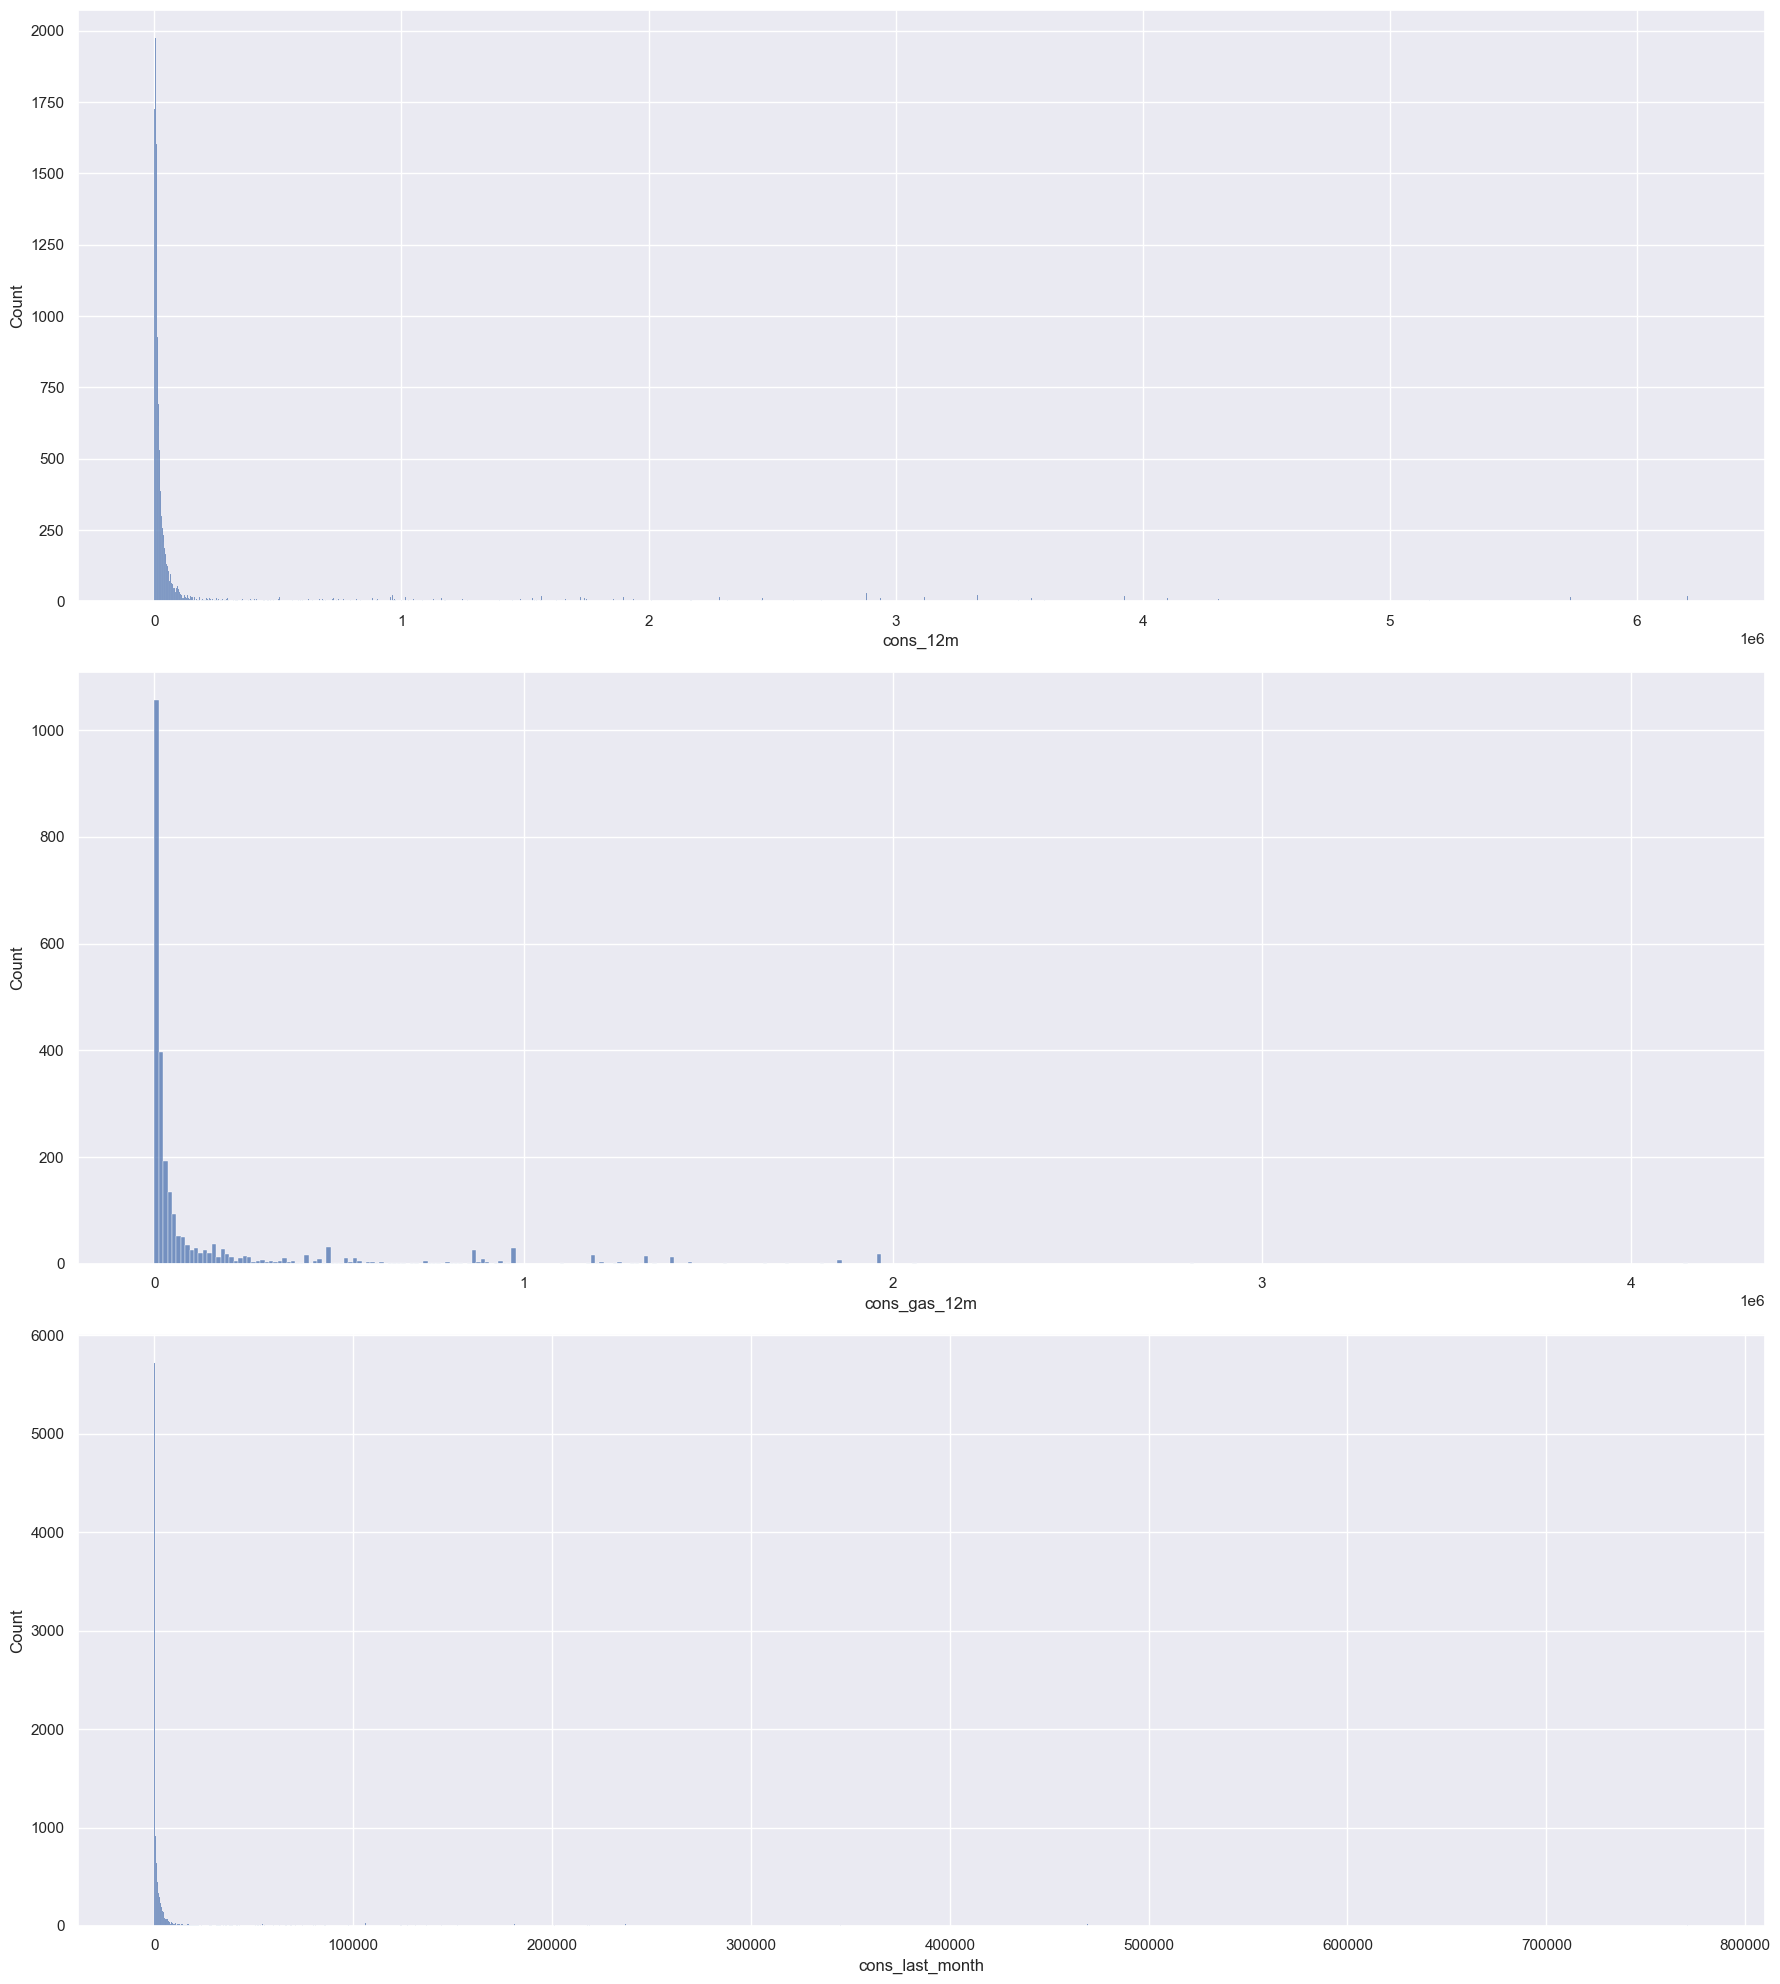

In [120]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(18, 20))  # Specify ncols=1 for vertical arrangement

# Plot histograms
sns.histplot(data=df["cons_12m"].dropna(), ax=axs[0], kde=False)
sns.histplot(data=df[df["has_gas"]==1]["cons_gas_12m"].dropna(), ax=axs[1], kde=False)
sns.histplot(data=df["cons_last_month"].dropna(), ax=axs[2], kde=False)

plt.tight_layout()  # Adjusts the subplots to fit nicely in the figure area
plt.show()

In [121]:
# # Apply log10 transformation
# df["cons_12m"] = np.log10(df["cons_12m"] + 1)
# df["cons_gas_12m"] = np.log10(df["cons_gas_12m"] + 1)
# df["cons_last_month"] = np.log10(df["cons_last_month"] + 1)
# df["forecast_cons_12m"] = np.log10(df["forecast_cons_12m"] + 1)
# df["forecast_cons_year"] = np.log10(df["forecast_cons_year"] + 1)
# df["forecast_meter_rent_12m"] = np.log10(df["forecast_meter_rent_12m"] + 1)
# df["imp_cons"] = np.log10(df["imp_cons"] + 1)

In [122]:
df['cons_12m'] = np.log10(df['cons_12m'] + 1)
df['cons_gas_12m'] = np.log10(df['cons_gas_12m'] + 1)
df['cons_last_month'] = np.log10(df['cons_last_month'] + 1)
df['forecast_cons_12m'] = np.log10(df['forecast_cons_12m'])
df['forecast_cons_year'] = np.log10(df['forecast_cons_year'] + 1)
df['forecast_discount_energy'] = np.log10(df['forecast_discount_energy'] + 1)
df['forecast_meter_rent_12m '] = np.log10(df['forecast_meter_rent_12m'] + 1)
df['forecast_price_energy_peak'] = np.log10(df['forecast_price_energy_peak'] + 1)
df['forecast_price_pow_off_peak'] = np.log10(df['forecast_price_pow_off_peak'] + 1)

/opt/anaconda3/envs/PowerCo/lib/python3.8/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


#### Subplots Configuration:
##### plt.subplots(nrows=3, ncols=1, figsize=(18, 20)): You specified only nrows=3, but you didn't define ncols. Since you want three plots vertically, you need to explicitly set ncols=1 for a single column of plots.
#### Data and Axes:
##### Each sns.histplot call uses data= to pass the series directly, which is a more explicit way of specifying what to plot.
ax= is used to specify which subplot to draw on. Since we have axs[0], axs[1], and axs[2], these correspond to the first, second, and third subplot in the figure.
#### Notes:
##### Ensure that df["has_gas"] contains the values (e.g., 1 for having gas)
##### Check if the dropping of NA values (dropna()) is necessary based on the data; if there are many missing values, this could significantly reduce your sample size for visualization.

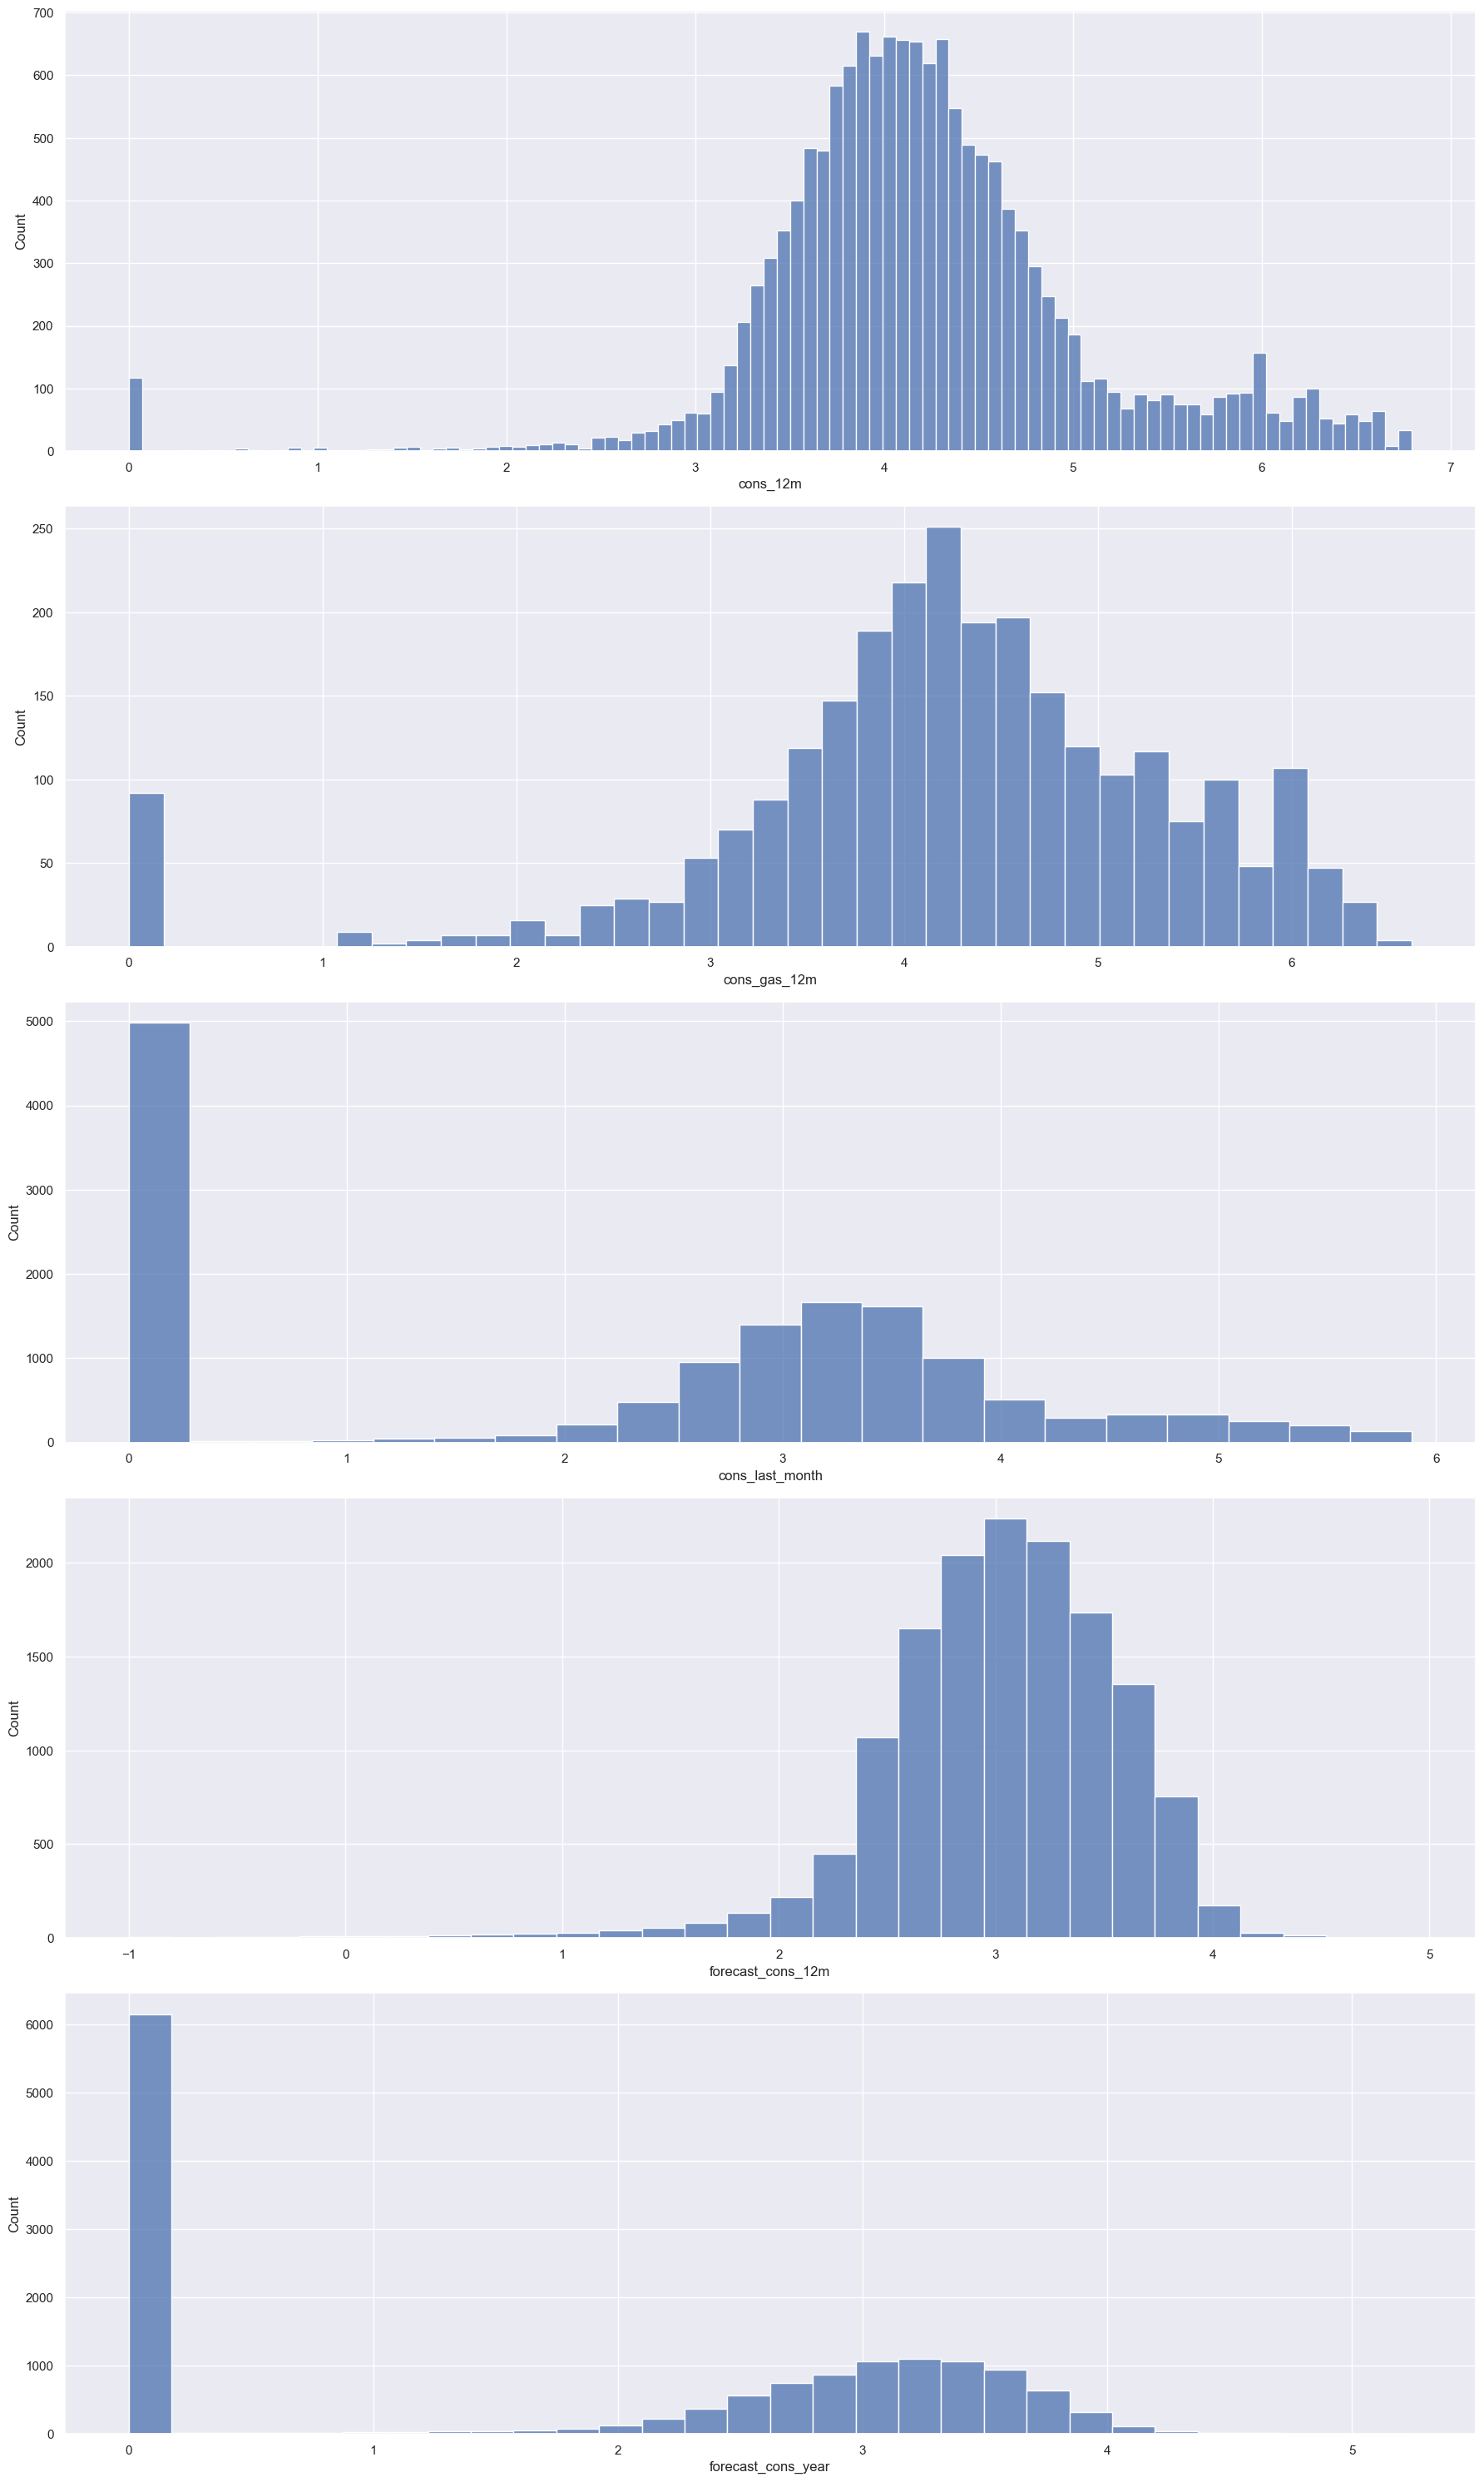

In [123]:
# First, let's show any previous plot
plt.show()

# Then, create a new figure with enough subplots
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(18, 30))  # Increased nrows to 6 to accommodate all plots

# Plot histograms
sns.histplot(data=df["cons_12m"].dropna(), ax=axs[0], kde=False)
sns.histplot(data=df[df["has_gas"]==1]["cons_gas_12m"].dropna(), ax=axs[1], kde=False)
sns.histplot(data=df["cons_last_month"].dropna(), ax=axs[2], kde=False)
sns.histplot(data=df["forecast_cons_12m"].dropna(), ax=axs[3], kde=False, bins=30)  # Changed to histplot
sns.histplot(data=df["forecast_cons_year"].dropna(), ax=axs[4], kde=False, bins=30)   # Changed to histplot


plt.tight_layout()  # Adjusts the subplots to fit nicely in the figure area
plt.show()

### Correlations

In terms of creating new features and transforming existing ones, it is very much a trial and error situation that requires iteration. Once we train a predictive model we can see which features work and don't work, we will also know how predictive this set of features is. Based on this, we can come back to feature engineering to enhance our model. 

For now, we will leave feature engineering at this point. Another thing that is always useful to look at is how correlated all of the features are within your dataset.

This is important because it reveals the linear relationships between features. We want features to correlate with `churn`, as this will indicate that they are good predictors of it. However features that have a very high correlation can sometimes be suspicious. This is because 2 columns that have high correlation indicates that they may share a lot of the same information. One of the assumptions of any parametric predictive model (as stated earlier) is that all features must be independent.

For features to be independent, this means that each feature must have absolutely no dependence on any other feature. If two features are highly correlated and share similar information, this breaks this assumption. 

Ideally, you want a set of features that have 0 correlation with all of the independent variables (all features except our target variable) and a high correlation with the target variable (churn). However, this is very rarely the case and it is common to have a small degree of correlation between independent features.

So now let's look at how all the features within the model are correlated.

In [124]:
print(df.dtypes)

id                                             object
cons_12m                                      float64
cons_gas_12m                                  float64
cons_last_month                               float64
forecast_cons_12m                             float64
                                               ...   
channel_usilxuppasemubllopkaafesmlibmsdf         bool
origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws       bool
origin_up_ldkssxwpmemidmecebumciepifcamkci       bool
origin_up_lxidpiddsbxsbosboudacockeimpuepw       bool
forecast_meter_rent_12m                       float64
Length: 64, dtype: object


##### By the below code, if some columns should be numeric but are strings, we can try converting them with more robust error handling:
##### This will attempt to convert all object type columns to numeric, setting non-convertible values to NaN.

In [125]:
for column in df.select_dtypes(include=['object']).columns:  # The subset of the frame including the dtypes in include and excluding the dtypes in exclud
    try:
        df[column] = pd.to_numeric(df[column], errors='coerce')
    except ValueError:
        print(f"Could not convert column {column} to numeric. Skipping.")

In [126]:
correlation = df.corr()

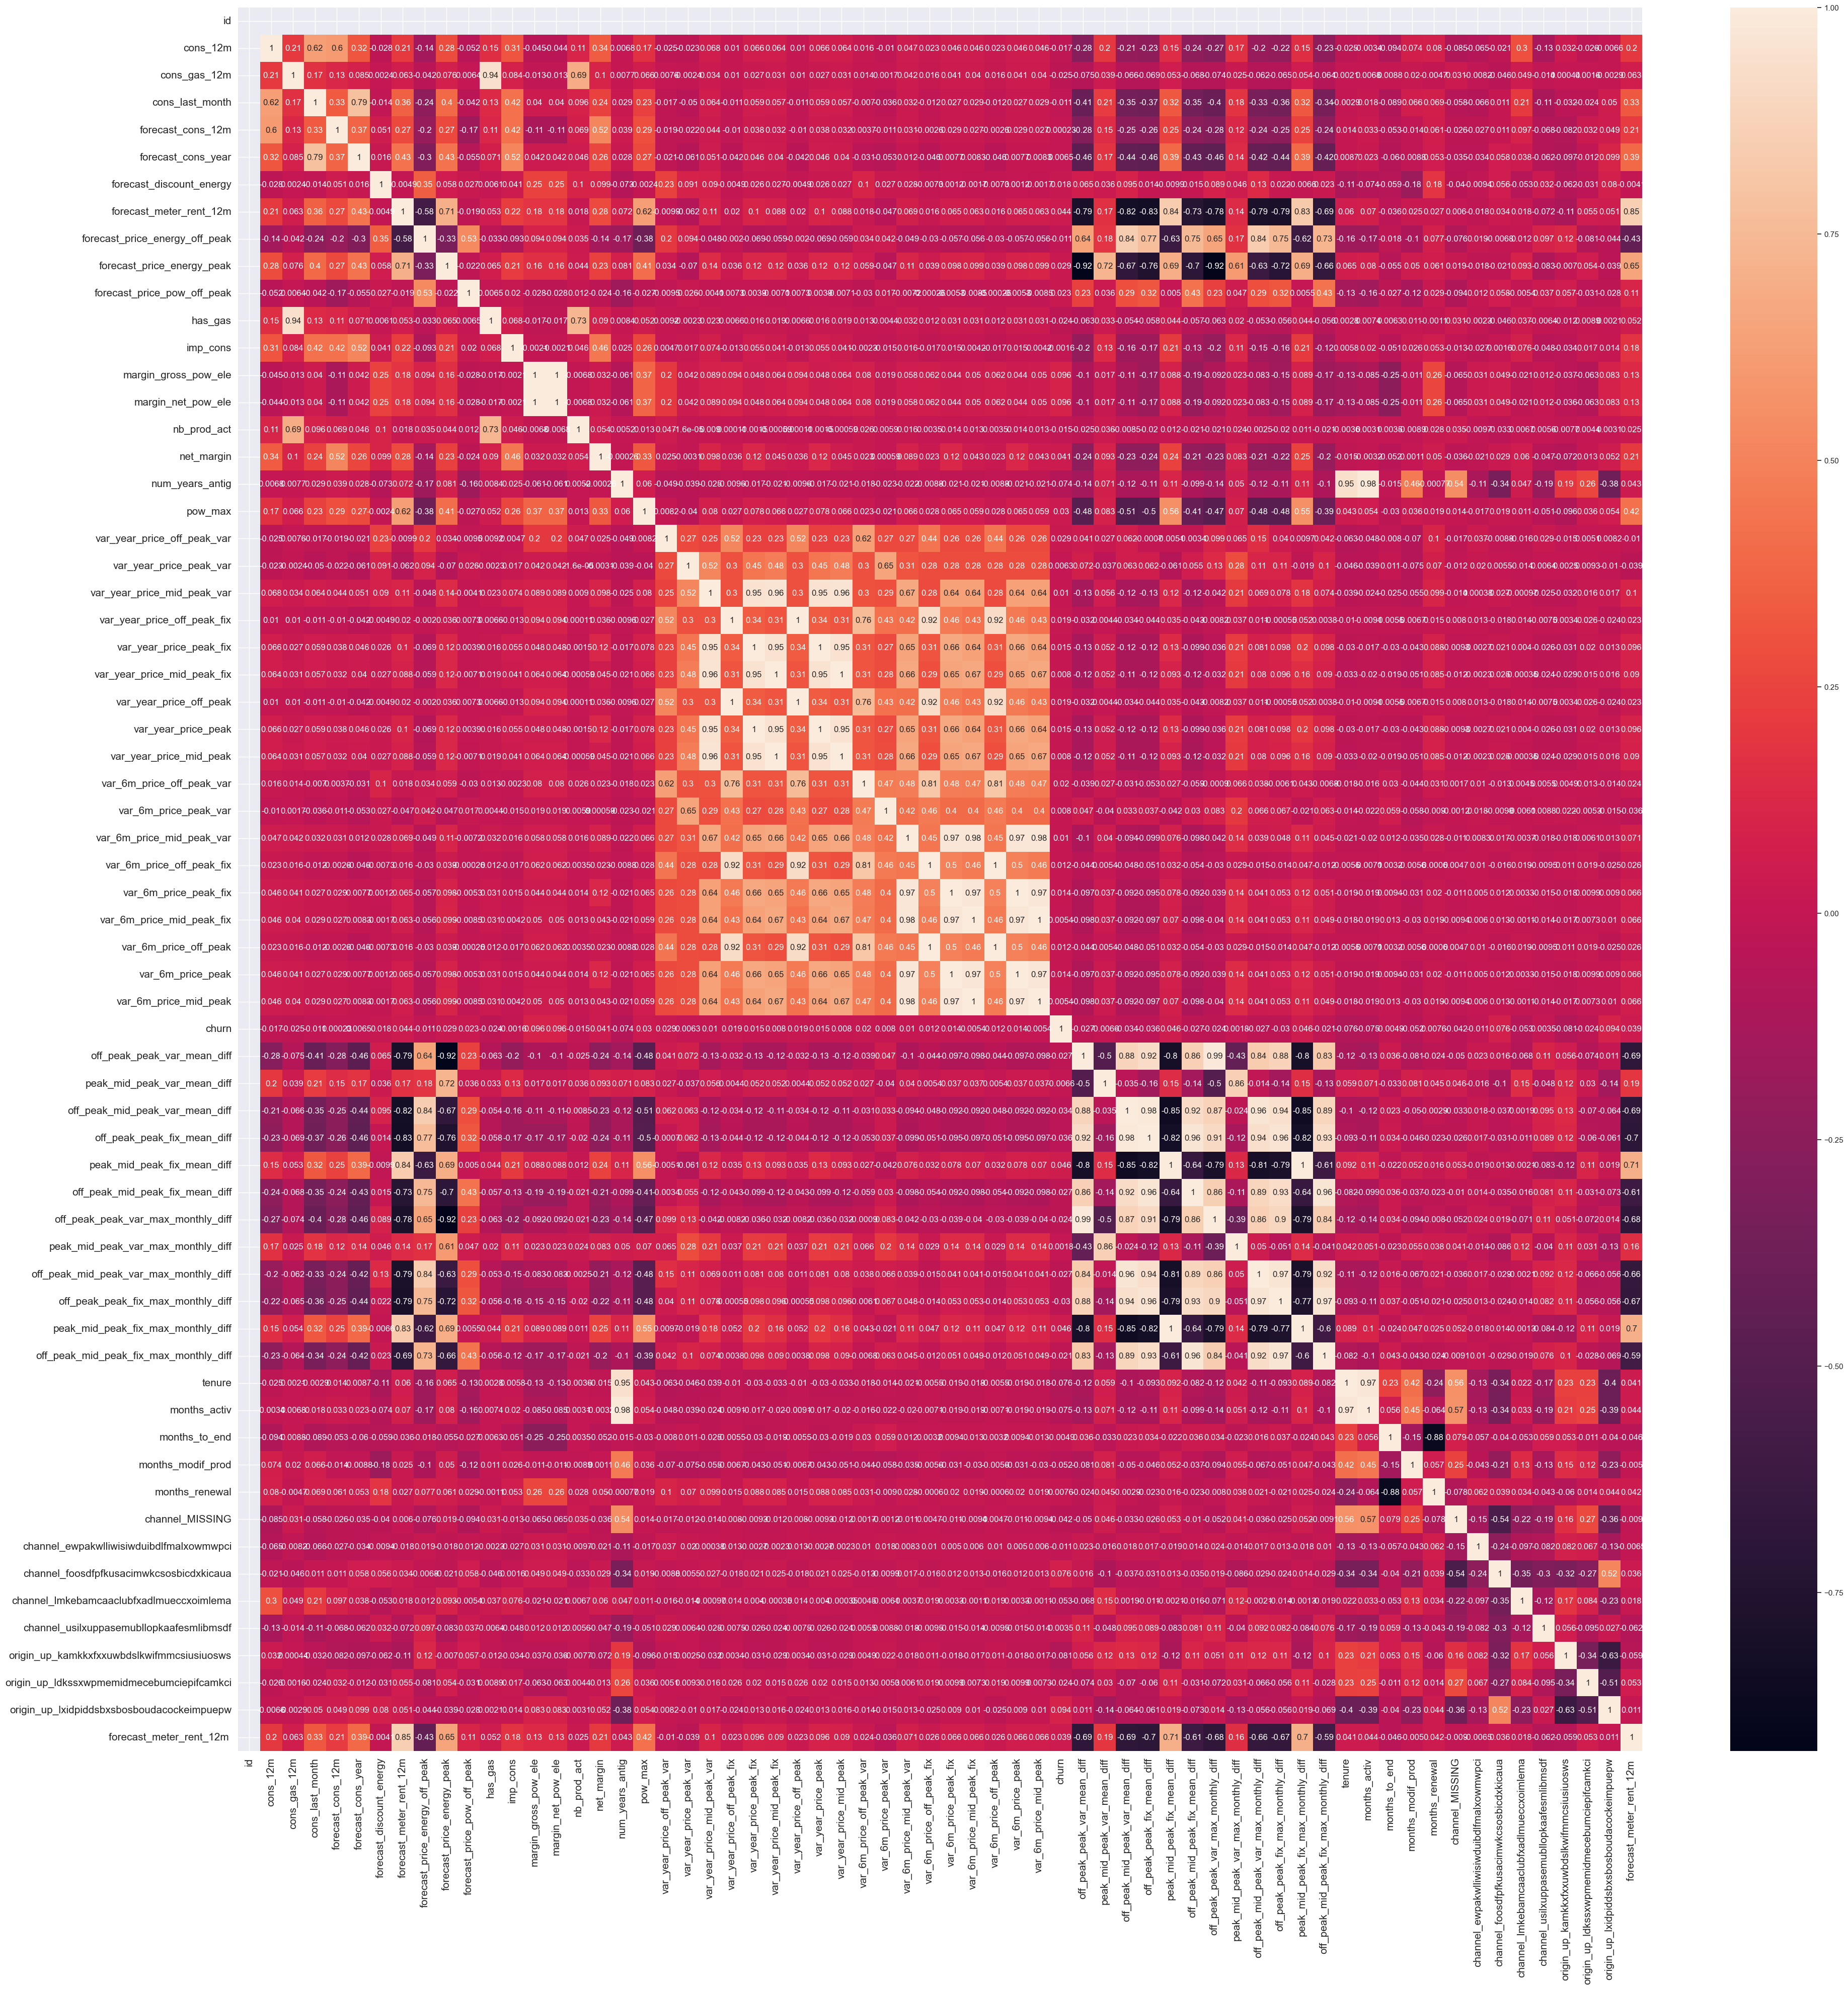

In [127]:
# Plot correlation
plt.figure(figsize=(45, 45))
sns.heatmap(
    correlation,
    xticklabels=correlation.columns.values,
    yticklabels=correlation.columns.values,
    annot=True,
    annot_kws={'size': 12}
)
# Axis ticks size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [128]:
data_for_predictions = pd.read_csv('/Users/geetgrover/Downloads/data_for_predictions.csv', sep = ',')
data_for_predictions
data_for_predictions.drop(columns=["Unnamed: 0"], inplace=True)
data_for_predictions.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57  0.000000      4.739944         0.000000   
1  d29c2c54acc38ff3c0614d0a653813dd  3.668479      0.000000         0.000000   
2  764c75f661154dac3a6c254cd082ea7d  2.736397      0.000000         0.000000   
3  bba03439a292a1e166f80264c16191cb  3.200029      0.000000         0.000000   
4  149d57cf92fc41cf94415803a877cb4b  3.646011      0.000000         2.721811   

   forecast_cons_12m  forecast_discount_energy  forecast_meter_rent_12m  \
0           0.000000                       0.0                 0.444045   
1           2.280920                       0.0                 1.237292   
2           1.689841                       0.0                 1.599009   
3           2.382089                       0.0                 1.318689   
4           2.650065                       0.0                 2.122969   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114481                    0.098142   
1                        0.145711                    0.000000   
2                        0.165794                    0.087899   
3                        0.146694                    0.000000   
4                        0.116900                    0.100015   

   forecast_price_pow_off_peak  ...  months_modif_prod  months_renewal  \
0                    40.606701  ...                  2               6   
1                    44.311378  ...                 76               4   
2                    44.311378  ...                 68               8   
3                    44.311378  ...                 69               9   
4                    40.606701  ...                 71               9   

   channel_MISSING  channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                0                                         0   
1                1                                         0   
2                0                                         0   
3                0                                         0   
4                1                                         0   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                         1   
1                                         0   
2                                         1   
3                                         0   
4                                         0   

   channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                         0   
1                                         0   
2                                         0   
3                                         1   
4                                         0   

   channel_usilxuppasemubllopkaafesmlibmsdf  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
0                                           0   
1                                           1   
2                                           1   
3                                           1   
4                                           1   

   origin_up_ldkssxwpmemidmecebumciepifcamkci  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   origin_up_lxidpiddsbxsbosboudacockeimpuepw  
0                                           1  
1                                           0  
2                                           0  
3                                           0  
4                                           0  

[5 rows x 63 columns]

In [129]:
# Make a copy of our data
train_df = data_for_predictions.copy()

# Separate target variable from independent variables
X = train_df.drop(columns = ['id', 'churn'])
y = train_df['churn']
print(X.shape)
print(y.shape)

(14606, 61)
(14606,)


In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10954, 61)
(10954,)
(3652, 61)
(3652,)


### Model training

Once again, we are using a `Random Forest` classifier in this example. A Random Forest sits within the category of `ensemble` algorithms because internally the `Forest` refers to a collection of `Decision Trees` which are tree-based learning algorithms. As the data scientist, you can control how large the forest is (that is, how many decision trees you want to include).

The reason why an `ensemble` algorithm is powerful is because of the laws of averaging, weak learners and the central limit theorem. If we take a single decision tree and give it a sample of data and some parameters, it will learn patterns from the data. It may be overfit or it may be underfit, but that is now our only hope, that single algorithm. 

With `ensemble` methods, instead of banking on 1 single trained model, we can train 1000's of decision trees, all using different splits of the data and learning different patterns. It would be like asking 1000 people to all learn how to code. You would end up with 1000 people with different answers, methods and styles! The weak learner notion applies here too, it has been found that if you train your learners not to overfit, but to learn weak patterns within the data and you have a lot of these weak learners, together they come together to form a highly predictive pool of knowledge! This is a real life application of many brains are better than 1.

Now instead of relying on 1 single decision tree for prediction, the random forest puts it to the overall views of the entire collection of decision trees. Some ensemble algorithms using a voting approach to decide which prediction is best, others using averaging. 

As we increase the number of learners, the idea is that the random forest's performance should converge to its best possible solution.

Some additional advantages of the random forest classifier include:

- The random forest uses a rule-based approach instead of a distance calculation and so features do not need to be scaled
- It is able to handle non-linear parameters better than linear based models

On the flip side, some disadvantages of the random forest classifier include:

- The computational power needed to train a random forest on a large dataset is high, since we need to build a whole ensemble of estimators.
- Training time can be longer due to the increased complexity and size of thee ensemble

In [131]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.9038882803943045
Precision: 0.8965347796810805
Recall: 0.9038882803943045
F1 Score: 0.8638988005042064


Accuracy: 0.9038, which means the model correctly predicted the churn outcome about 90.39% of the time on the test set.
Precision: 0.8965, indicating that when the model predicted a churn, it was correct about 89.65% of the time.
Recall: 0.9038, showing that the model identified about 90.39% of all actual churn cases.
F1 Score: 0.8639, which is the harmonic mean of precision and recall, providing a good balance between the two.

These results suggest that the model has a good balance between identifying true positives (churn cases) and minimizing false positives. 

                                     feature  importance
0                                   cons_12m    0.054688
14                                net_margin    0.051908
5                    forecast_meter_rent_12m    0.051402
3                          forecast_cons_12m    0.048628
11                      margin_gross_pow_ele    0.047846
..                                       ...         ...
54  channel_ewpakwlliwisiwduibdlfmalxowmwpci    0.002598
29                     var_6m_price_peak_fix    0.002076
30                 var_6m_price_mid_peak_fix    0.002068
4                   forecast_discount_energy    0.001113
46        peak_mid_peak_fix_max_monthly_diff    0.000977

[61 rows x 2 columns]


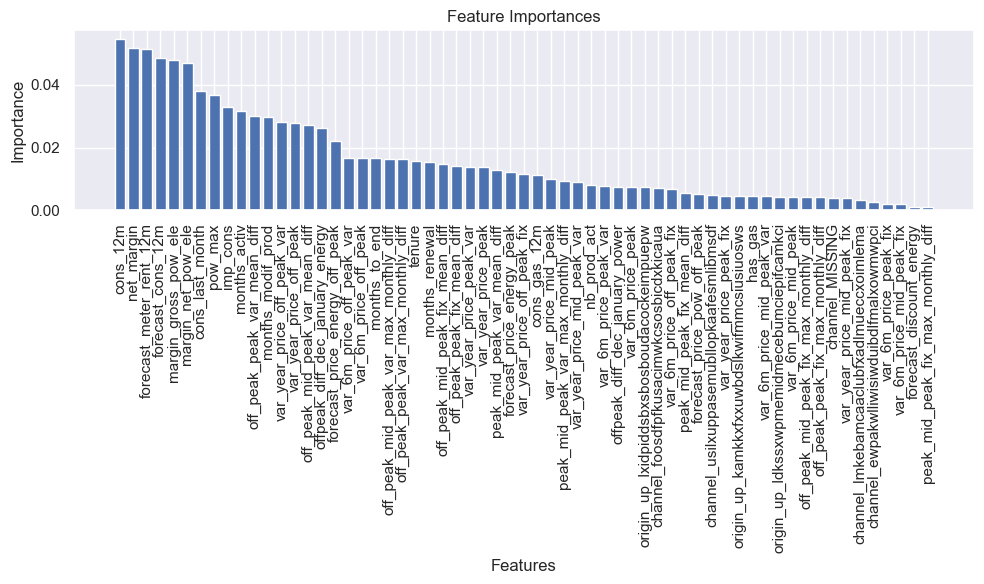

In [132]:
# Assuming rf_classifier is your trained RandomForestClassifier
feature_importance = rf_classifier.feature_importances_

# Create a DataFrame with features and their importance
feature_importance_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importance})

# Sort by importance in descending order
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

# Print the feature importance
print(feature_importance_df)

# Optionally, visualize the feature importance
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['feature'], feature_importance_df['importance'])
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [133]:
# Assuming we have the feature importance scores from the model
feature_importance = rf_classifier.feature_importances_

# Create a DataFrame with features and their importance
feature_importance_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importance})

# Filter features with importance >= 0.01
features_to_keep = feature_importance_df[feature_importance_df['importance'] >= 0.01]['feature'].tolist()

# Apply the condition to keep only features with importance >= 0.01
X_train_imp = train_df[features_to_keep]
y = train_df['churn']

print(X_train_imp.shape)
print(y_train.shape)

(14606, 32)
(10954,)


In [134]:
# Split the data again with the reduced feature set
X_train_imp, X_test_imp, y_train, y_test = train_test_split(X_train_imp, y, test_size=0.25, random_state=42)

# Initialize and train the model with the important features
rf_classifier_imp = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_imp.fit(X_train_imp, y_train)

# Make predictions on the test set
y_pred_imp = rf_classifier_imp.predict(X_test_imp)

# Evaluate the model
accuracy_imp = accuracy_score(y_test, y_pred_imp)
precision_imp = precision_score(y_test, y_pred_imp, average='weighted')
recall_imp = recall_score(y_test, y_pred_imp, average='weighted')
f1_imp = f1_score(y_test, y_pred_imp, average='weighted')

print(f"Accuracy with important features (importance >= 0.01): {accuracy_imp}")
print(f"Precision with important features (importance >= 0.01): {precision_imp}")
print(f"Recall with important features (importance >= 0.01): {recall_imp}")
print(f"F1 Score with important features (importance >= 0.01): {f1_imp}")

Accuracy with important features (importance >= 0.01): 0.9041621029572837
Precision with important features (importance >= 0.01): 0.8951163968375673
Recall with important features (importance >= 0.01): 0.9041621029572837
F1 Score with important features (importance >= 0.01): 0.8649568738518287


it seems that by selecting features with an importance score of 0.01 or greater, your model's performance has slightly improved or at least maintained its effectiveness compared to the previous results:

Accuracy: 0.9042, which is a slight improvement from 0.9039.
Precision: 0.8951, a minor decrease from 0.8965.
Recall: 0.9042, the same as the accuracy, showing a slight improvement from 0.9039.
F1 Score: 0.8650, a slight increase from 0.8639.

In [135]:
from sklearn.model_selection import cross_val_score

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
cv_scores = cross_val_score(rf_classifier, X_train_imp, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

Cross-validation scores: [0.90597901 0.90917389 0.90597901 0.90506618 0.90821918]
Mean CV Score: 0.9069 (+/- 0.0031)


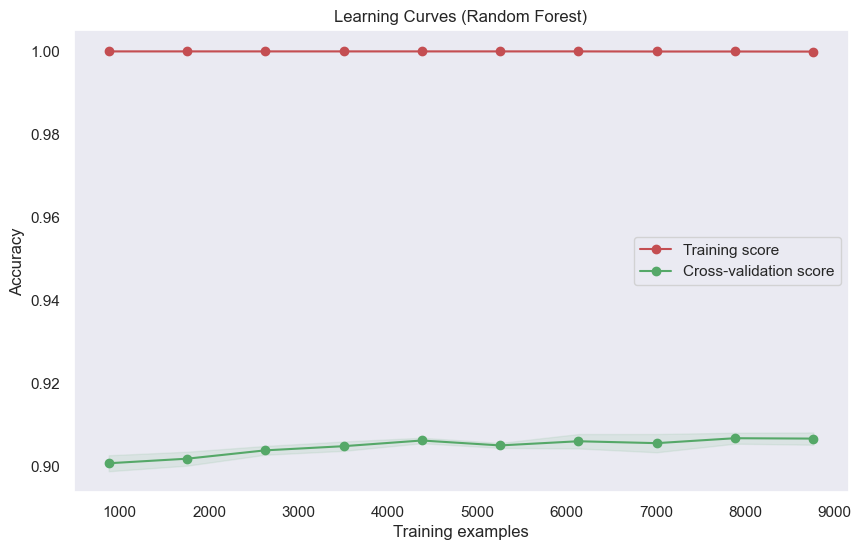

In [136]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(
    rf_classifier, X_train_imp, y_train, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.title("Learning Curves (Random Forest)")
plt.xlabel("Training examples")
plt.ylabel("Accuracy")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

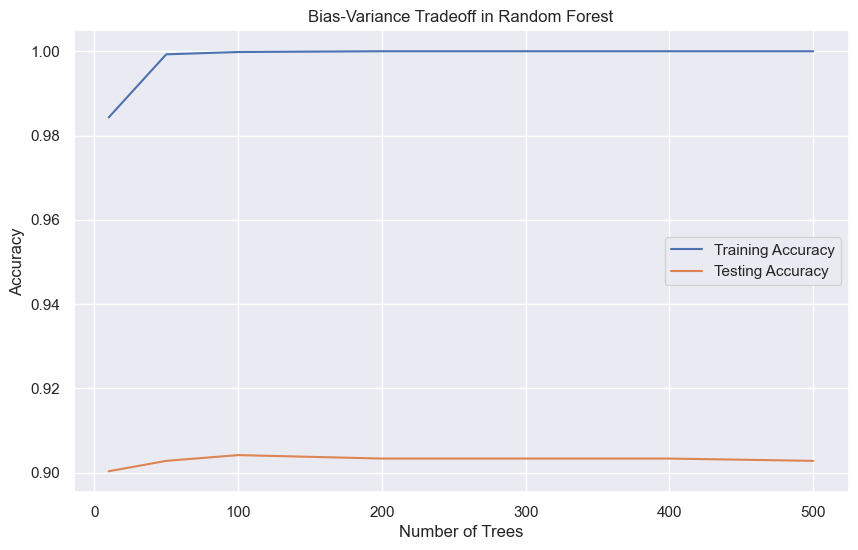

In [137]:
n_estimators_range = [10, 50, 100, 200, 300, 400, 500]
train_scores = []
test_scores = []

for n_estimators in n_estimators_range:
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf.fit(X_train_imp, y_train)

    train_scores.append(accuracy_score(y_train, rf.predict(X_train_imp)))
    test_scores.append(accuracy_score(y_test, rf.predict(X_test_imp)))

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, train_scores, label='Training Accuracy')
plt.plot(n_estimators_range, test_scores, label='Testing Accuracy')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Bias-Variance Tradeoff in Random Forest')
plt.legend()
plt.show()

##### 1. Cross-Validation Scores
Scores: [0.90588638, 0.90961999, 0.90961999, 0.9075659, 0.9082506]
Mean CV Score: 0.9082 (+/- 0.0028)

Interpretation: 
The cross-validation scores are quite consistent across the 5 folds, with a mean accuracy of approximately 90.82%. The small standard deviation (0.0028) indicates that the model's performance is stable across different subsets of the data, suggesting good generalization capability. This consistency is a good sign that the model is not overfitting significantly, as there's little variance in performance across different data splits.


##### 2. Learning Curves
Training Score: Remains at 1.00 across all training sizes.
Cross-Validation Score: Starts around 0.90 and slightly increases as more training examples are used, stabilizing around 0.91.

Interpretation: 
Training Score: The training accuracy being 1.00 across all training sizes suggests that the model has very low bias, as it can perfectly fit the training data. This is typical for Random Forests as they are prone to overfitting the training data due to their high capacity.
Cross-Validation Score: The CV score increases as more data is used, indicating that the model benefits from more training examples, which is reducing variance. The gap between the training score and CV score is significant, which is common in Random Forests but indicates some level of overfitting. However, since the CV score is high and improves with more data, it suggests that while there is some overfitting, the model is still generalizing well. The slight increase in CV score with more data also implies that adding more data could potentially improve the model's performance further.

##### 3. Bias-Variance Tradeoff in Random Forest
Training Accuracy: Starts high and stabilizes around 1.00.
Testing Accuracy: Starts lower than training accuracy but stabilizes around 0.91.

Interpretation: 
Training Accuracy: The high and stable training accuracy (1.00) indicates that the model has very low training error, suggesting low bias.
Testing Accuracy: The testing accuracy is lower than the training accuracy but is stable around 0.91, which is close to the CV scores from the first plot, indicating that the model generalizes reasonably well. 
Number of Trees: As the number of trees increases, both training and testing accuracy stabilize, showing that the variance is being reduced with more trees (as Random Forests average over more trees, reducing overfitting). The small gap between training and testing accuracy suggests a good balance in the bias-variance tradeoff, where increasing the number of trees beyond a certain point (around 100 in this case) doesn't significantly improve test performance, indicating that the model has found a reasonable balance between fitting the training data well and generalizing to new data.

#### Summary:
Overfitting: There is some indication of overfitting (high training accuracy vs. lower but stable testing/CV accuracy), which is expected with Random Forests due to their complexity. However, the model's ability to generalize well (high CV and test scores) suggests this overfitting is managed.
Bias-Variance Tradeoff: The model shows low bias (high training accuracy) and a good control over variance with an increasing number of trees, stabilizing at a point where additional trees do not significantly improve performance on the test set.
Model Flexibility: The model's flexibility is demonstrated by its ability to achieve perfect training accuracy while maintaining high test accuracy. The learning curve suggests that while the model is flexible, it benefits from more data to reduce variance.

Overall, Random Forest model seems to be performing well, balancing between overfitting the training data and generalizing to unseen data, with a particular strength in reducing variance by increasing the number of trees.